In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import figure, legend, format_plots
import colorcet as cc

In [2]:
format_plots()

In [3]:
def get_ont_map():
    df = pd.read_parquet(
        "/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_syllable_df_v00.parquet"
    )
    _, umap = relabel_by_usage(df, return_map=True)
    return umap

In [7]:
def get_session_and_experiment_type(df):
    session_type = []
    exp_type = []
    for idx, row in df.iterrows():
        masks = df.loc[df['subject_name'] == row.subject_name]
        masks.drop(index=idx)
        if masks['date'].iloc[0] < row.date:
            session_type.append('after')
        else:
            session_type.append('before')
        if int(row.subject_name.split('_')[1]) in [2, 4]:
            exp_type.append('klothos')
        else:
            exp_type.append('saline')
    df['session_type'] = session_type
    df['exp_type'] = exp_type
    return df

In [12]:
def load_klotho():
    umap = get_ont_map()
    df = pd.read_parquet(
        "/n/groups/datta/win/longtogeny/data/ontogeny/version_08/klothos_syllable_df_v00.parquet"
    )
    df["relabeled_syllables"] = df["syllables"].map(umap)
    usages = (
        df.query("onsets")
        .groupby(["subject_name", "date"])["relabeled_syllables"]
        .value_counts(normalize=True)
    )
    usage_mtx = pd.pivot_table(
        usages.reset_index(),
        index=["subject_name", "date"],
        columns="relabeled_syllables",
        values="proportion",
        fill_value=0,
    )
    exp_mapping = get_session_and_experiment_type(usage_mtx[0].reset_index())
    exp_mapping = exp_mapping.set_index(usage_mtx.index.names)
    usage_mtx[['exp_type', 'session_type']] = exp_mapping[['exp_type', 'session_type']]
    usage_mtx.set_index(['exp_type', 'session_type'], append=True, inplace=True)
    return usage_mtx

In [13]:
klotho_mtx = load_klotho()

In [14]:
klotho_mtx

relabeled_syllables                                           0         1   \
subject_name date                exp_type session_type                       
K90M_01_01   2023-12-05 15:33:09 saline   before        0.077358  0.040881   
             2023-12-06 15:26:40 saline   after         0.072119  0.046239   
K90M_01_02   2023-12-05 12:33:28 saline   before        0.047181  0.033395   
             2023-12-06 12:28:27 saline   after         0.036540  0.029165   
K90M_01_03   2023-12-05 15:33:42 saline   before        0.046824  0.075966   
             2023-12-06 15:30:14 saline   after         0.044746  0.079549   
K90M_01_04   2023-12-05 12:33:57 saline   before        0.037155  0.019108   
             2023-12-06 12:30:26 saline   after         0.039492  0.019918   
K90M_02_01   2023-12-05 16:10:55 klothos  before        0.015421  0.017097   
             2023-12-06 16:17:22 klothos  after         0.007424  0.015219   
K90M_02_02   2023-12-05 13:11:06 klothos  before        0.063616  0.036039   
             2023-12-06 13:17:36 klothos  after         0.062036  0.039095   
K90M_02_03   2023-12-05 16:11:24 klothos  before        0.028538  0.040186   
             2023-12-06 16:17:53 klothos  after         0.034716  0.054722   
K90M_02_04   2023-12-05 13:11:35 klothos  before        0.042828  0.041068   
             2023-12-06 13:18:03 klothos  after         0.028118  0.043334   
K90M_03_01   2023-12-05 16:47:29 saline   before        0.061585  0.035061   
             2023-12-06 16:54:06 saline   after         0.063168  0.038770   
K90M_03_02   2023-12-05 13:47:43 saline   before        0.055075  0.052193   
             2023-12-06 13:54:19 saline   after         0.060175  0.063457   
K90M_03_03   2023-12-05 16:48:00 saline   before        0.052982  0.035789   
             2023-12-06 16:54:35 saline   after         0.057112  0.041833   
K90M_03_04   2023-12-05 13:48:12 saline   before        0.045714  0.052932   
             2023-12-06 13:54:47 saline   after         0.058215  0.056274   
K90M_04_01   2023-12-05 17:24:35 klothos  before        0.102931  0.042888   
             2023-12-06 17:29:57 klothos  after         0.100078  0.046548   
K90M_04_02   2023-12-05 14:24:46 klothos  before        0.039775  0.053178   
             2023-12-06 14:30:09 klothos  after         0.043459  0.044346   
K90M_04_03   2023-12-05 17:25:04 klothos  before        0.062908  0.048814   
             2023-12-06 17:30:26 klothos  after         0.035206  0.028085   
K90M_04_04   2023-12-05 14:25:18 klothos  before        0.091740  0.035021   
             2023-12-06 14:30:35 klothos  after         0.067399  0.032563   

relabeled_syllables                                           2         3   \
subject_name date                exp_type session_type                       
K90M_01_01   2023-12-05 15:33:09 saline   before        0.043082  0.039937   
             2023-12-06 15:26:40 saline   after         0.052795  0.033126   
K90M_01_02   2023-12-05 12:33:28 saline   before        0.037377  0.029412   
             2023-12-06 12:28:27 saline   after         0.039557  0.026483   
K90M_01_03   2023-12-05 15:33:42 saline   before        0.037983  0.037001   
             2023-12-06 15:30:14 saline   after         0.035797  0.022539   
K90M_01_04   2023-12-05 12:33:57 saline   before        0.030432  0.041401   
             2023-12-06 12:30:26 saline   after         0.025069  0.041896   
K90M_02_01   2023-12-05 16:10:55 klothos  before        0.067382  0.001341   
             2023-12-06 16:17:22 klothos  after         0.051967  0.000000   
K90M_02_02   2023-12-05 13:11:06 klothos  before        0.035099  0.029144   
             2023-12-06 13:17:36 klothos  after         0.047819  0.014863   
K90M_02_03   2023-12-05 16:11:24 klothos  before        0.029994  0.021549   
             2023-12-06 16:17:53 klothos  after         0.035305  0.025302   
K90M_02_04   2023-12-05 13:11:35 klothos  before        0.041948  0.032854   
             2023-12-

In [15]:
ont_usage_mtx = pd.read_parquet("/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_clean_v2.parquet")

In [17]:
age = ont_usage_mtx.index.get_level_values('age')

In [20]:
mask = age == 90

In [21]:
ont_olds = ont_usage_mtx[mask]

In [26]:
ont_olds = ont_olds.droplevel(['age', 'session_name', 'uuid', 'velocity'])

In [27]:
ont_olds['session_type'] = "ont"
ont_olds['exp_type'] = "ont"

In [28]:
ont_olds.set_index(['exp_type', 'session_type'], append=True, inplace=True)

In [29]:
combined = pd.concat([klotho_mtx, ont_olds])

/n/groups/datta/win/longtogeny/code/aging/plotting.py:25: RuntimeWarning: More than 40 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  return plt.figure(figsize=(width, height), dpi=dpi, **kwargs)


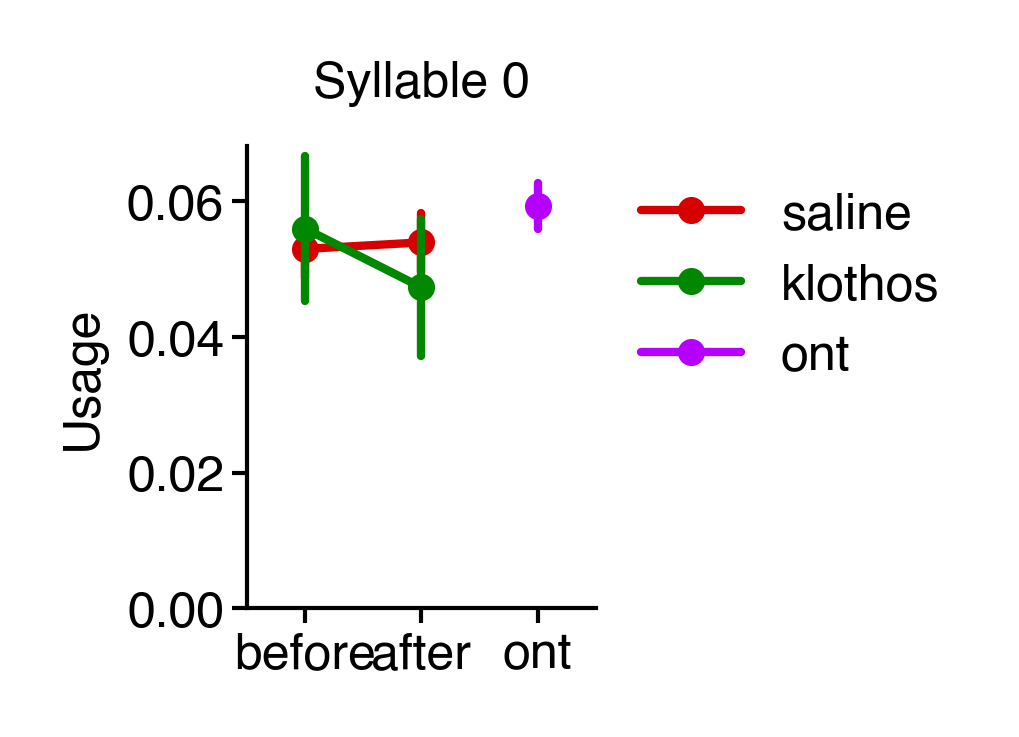

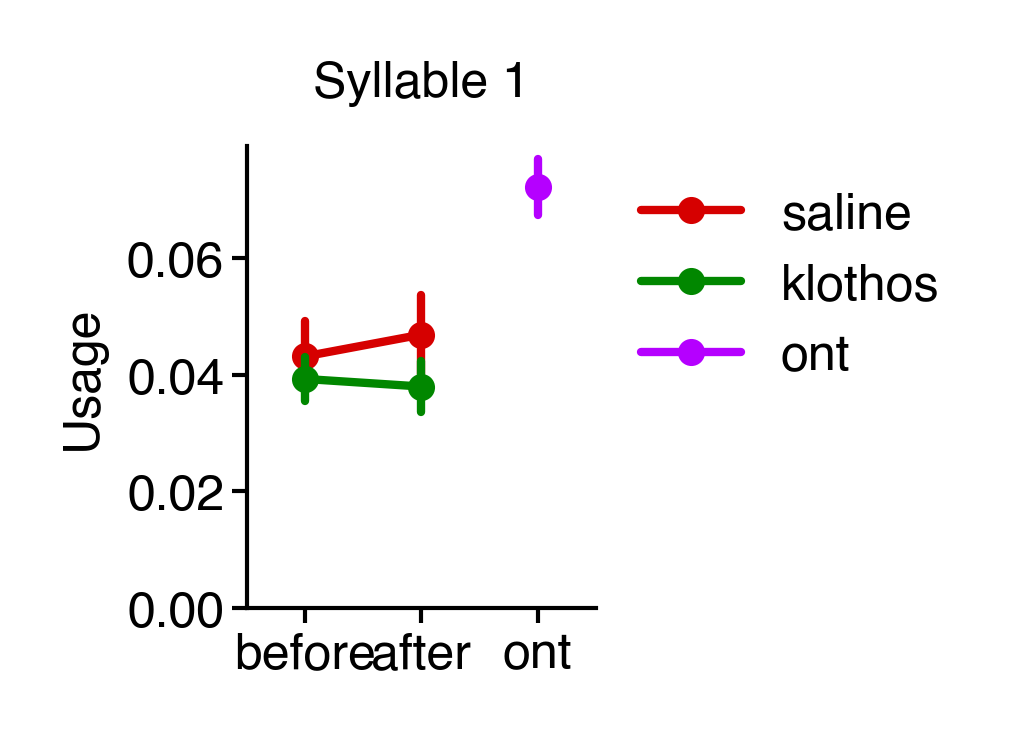

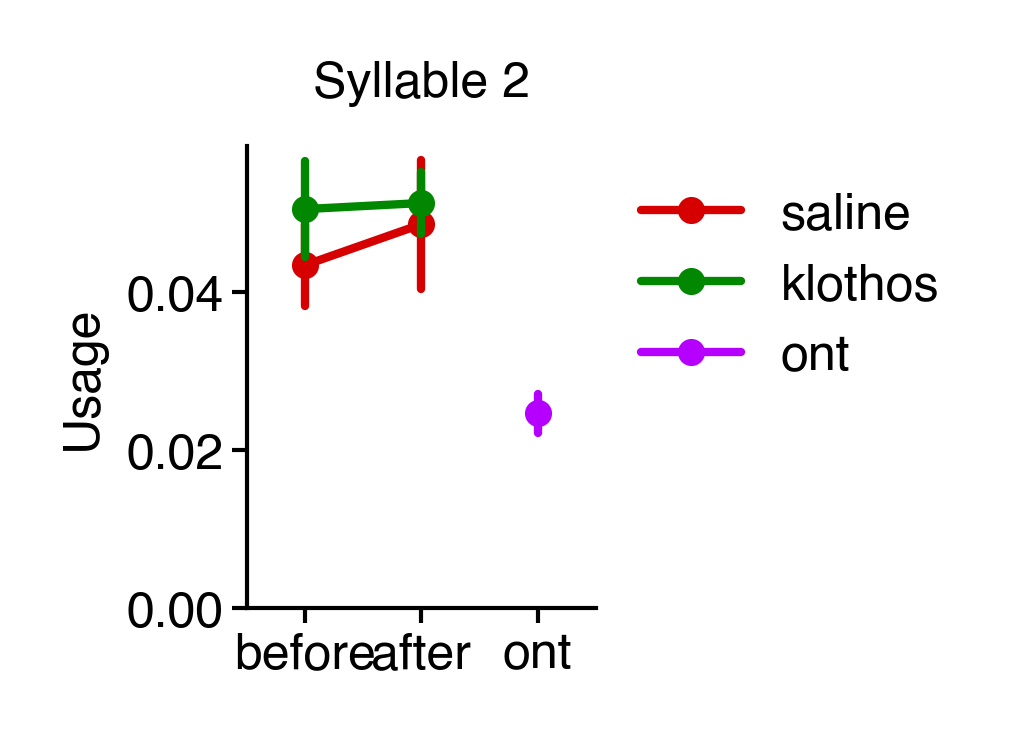

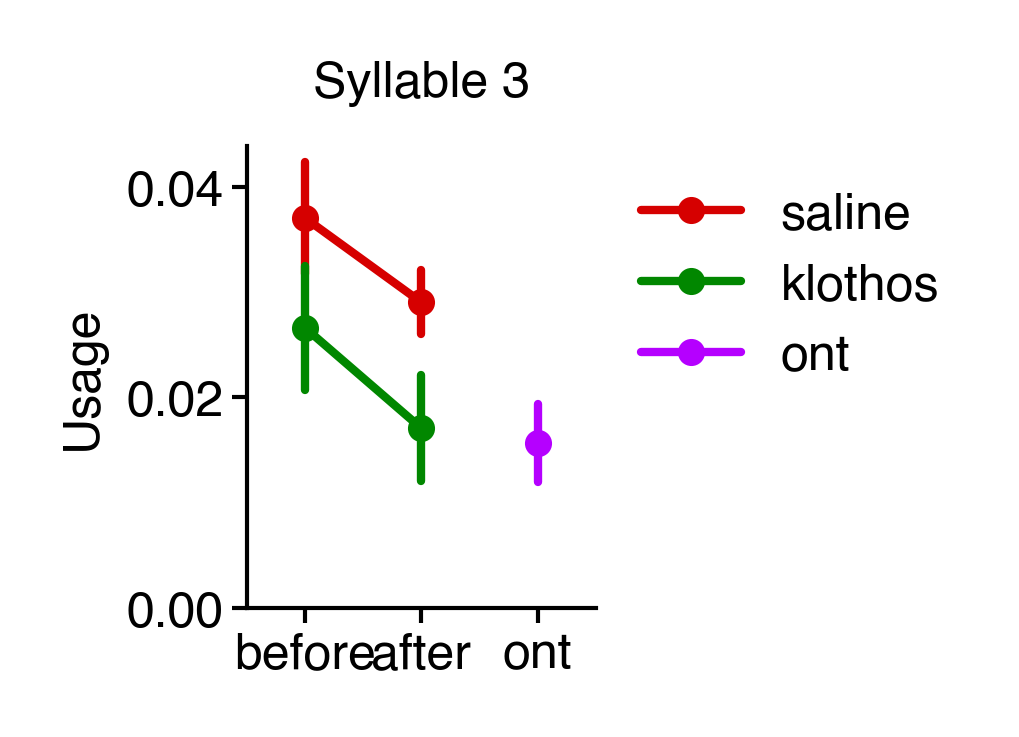

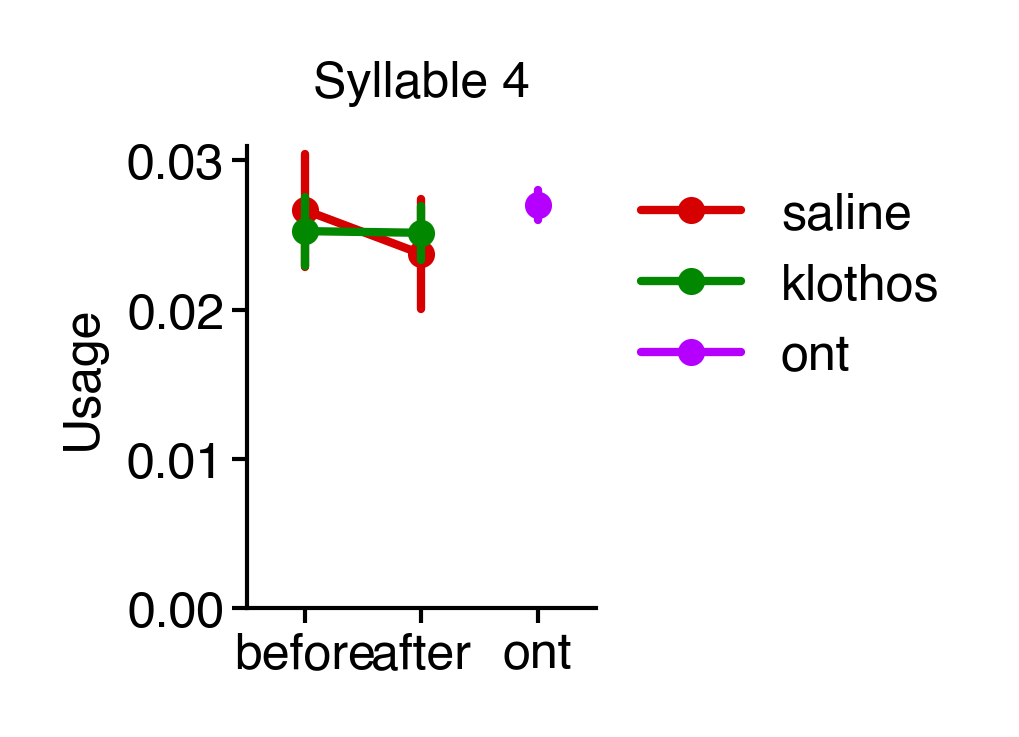

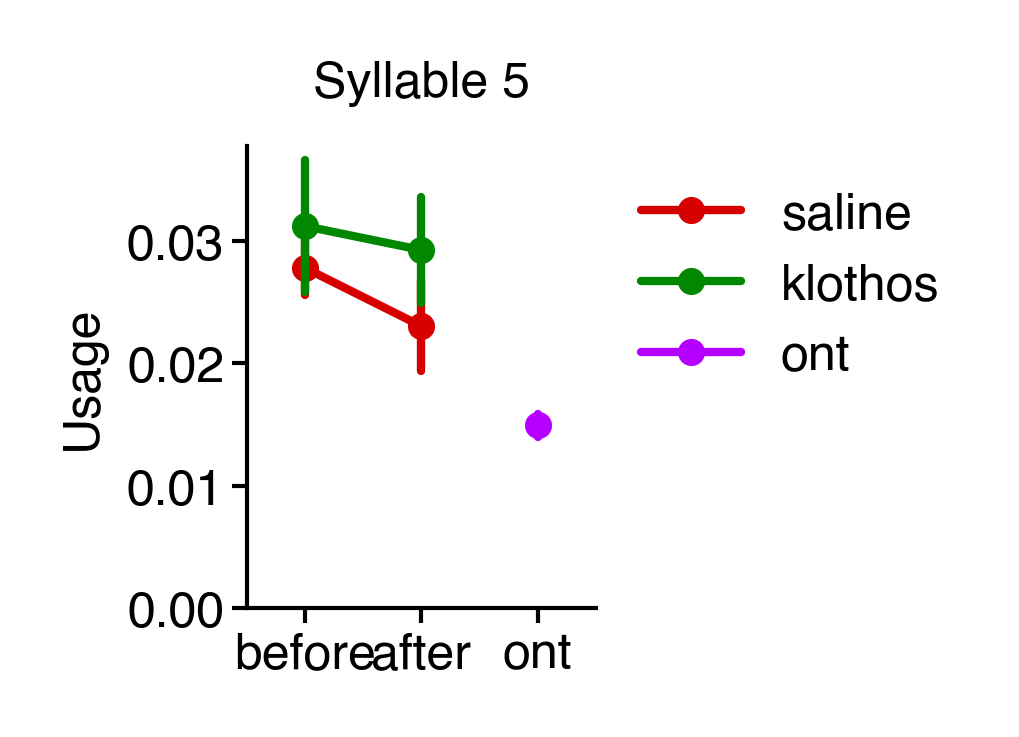

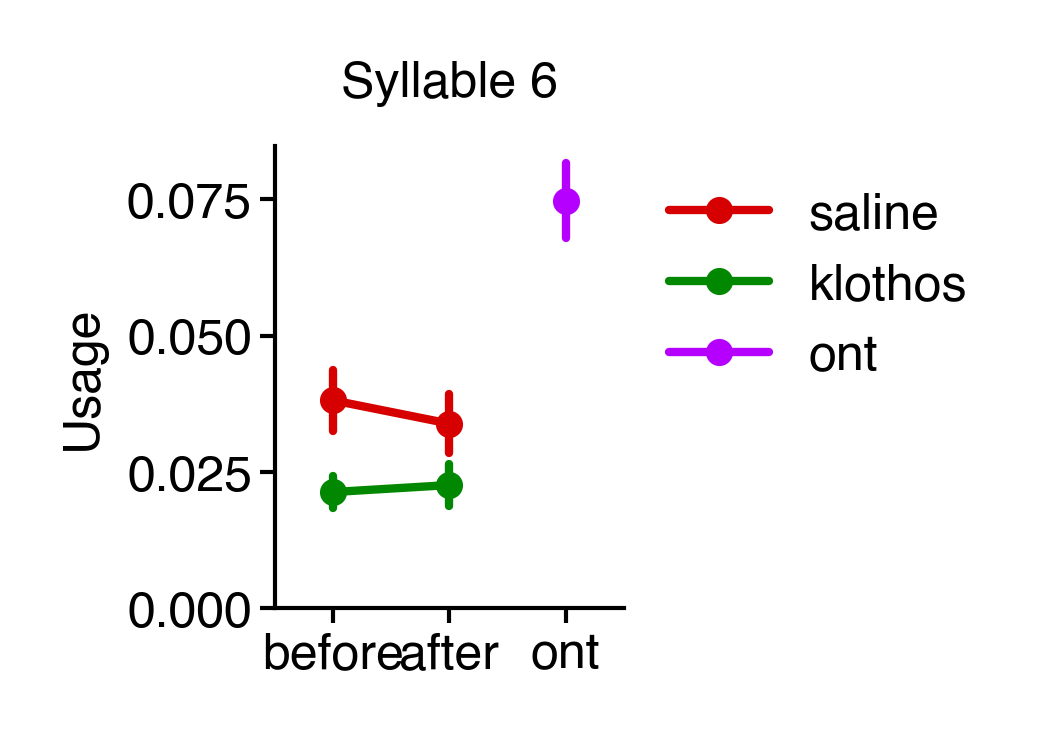

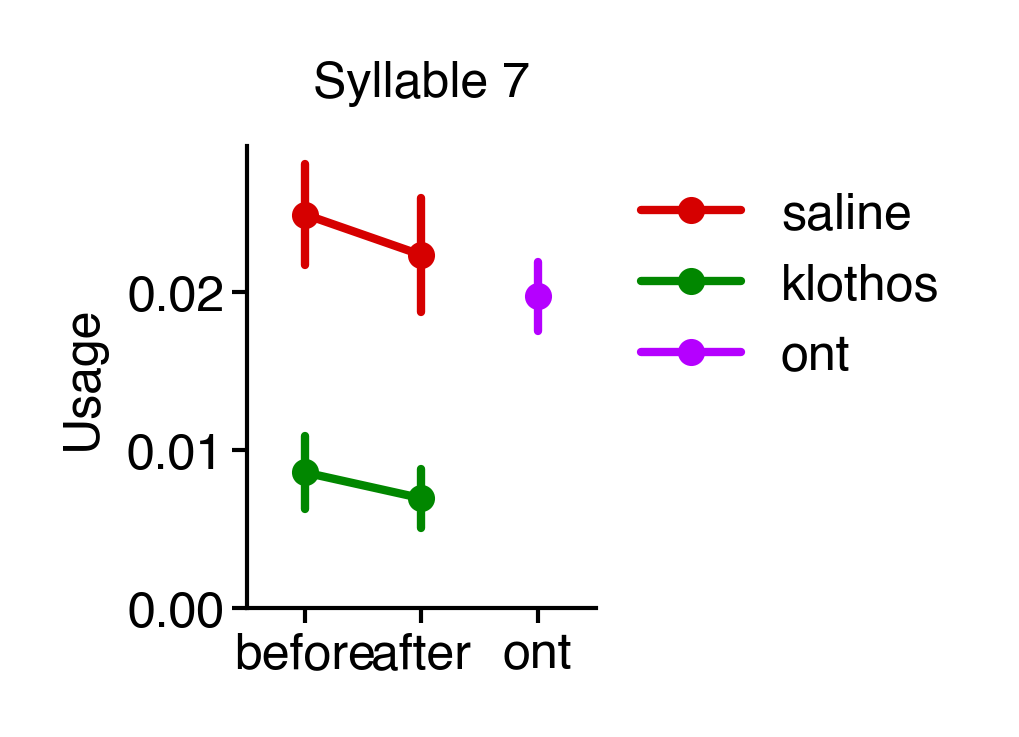

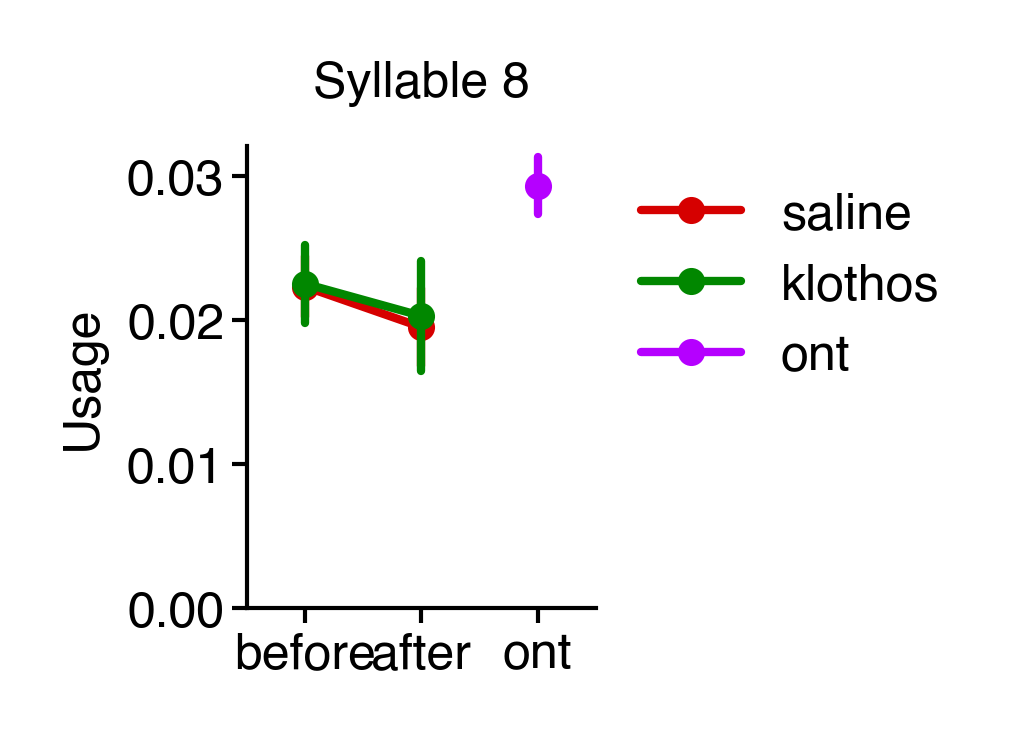

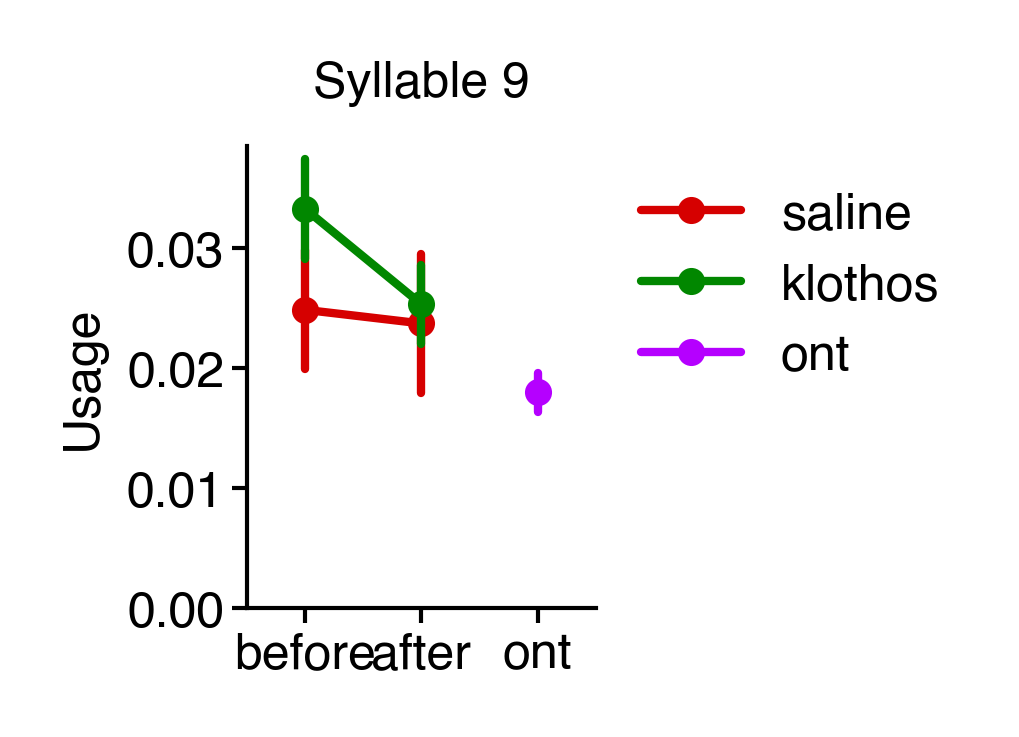

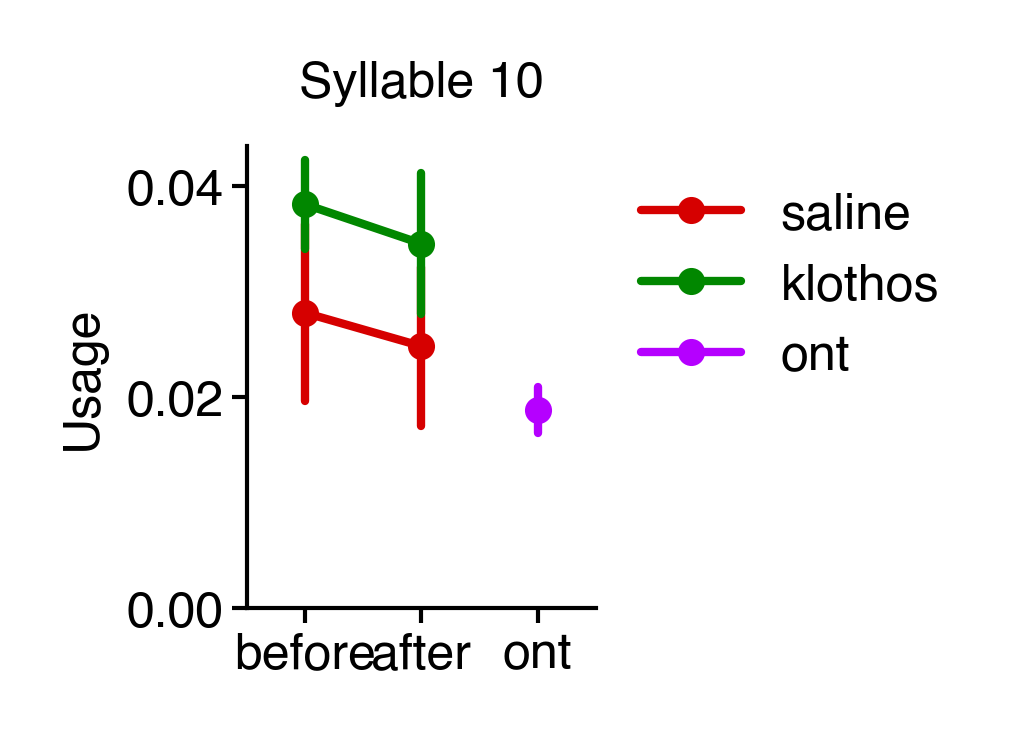

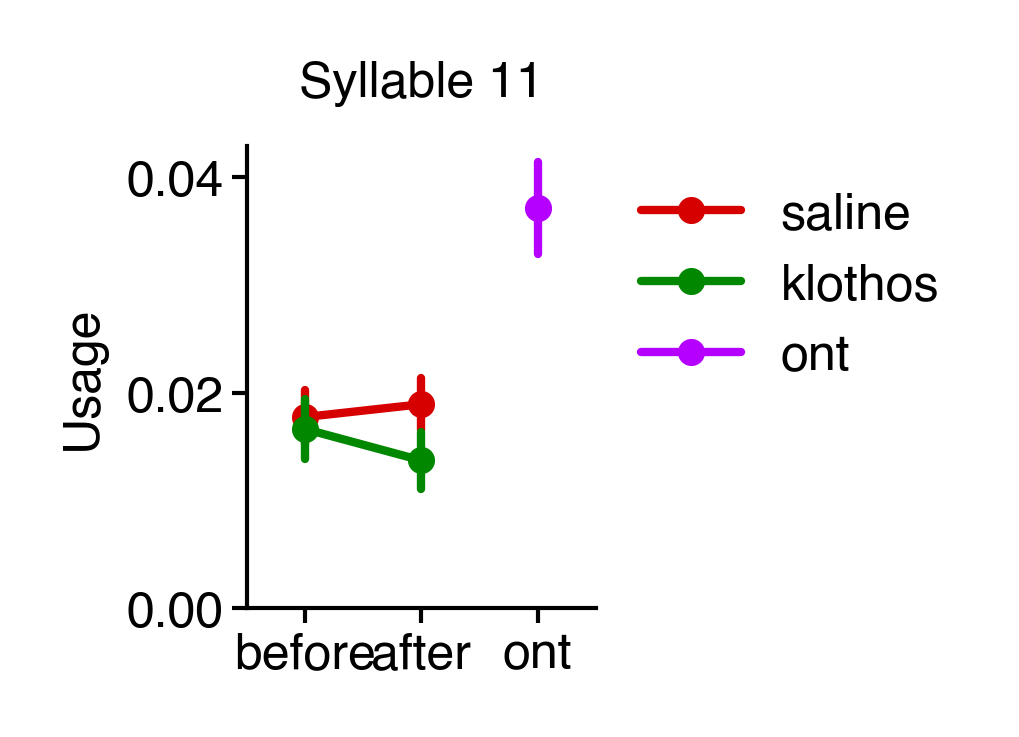

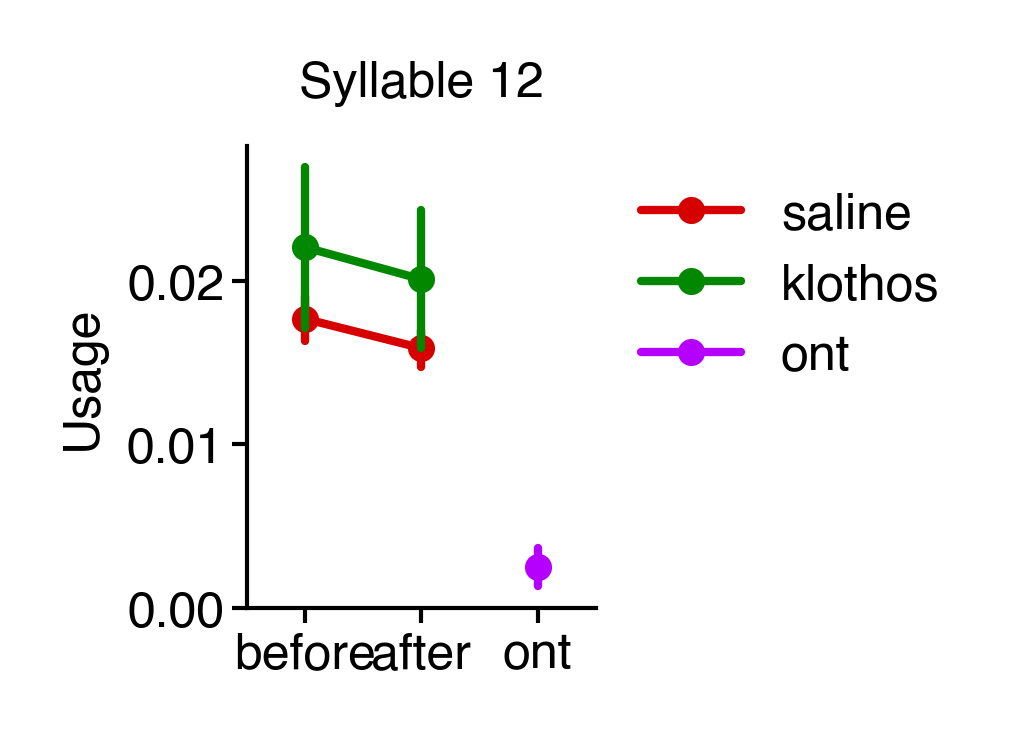

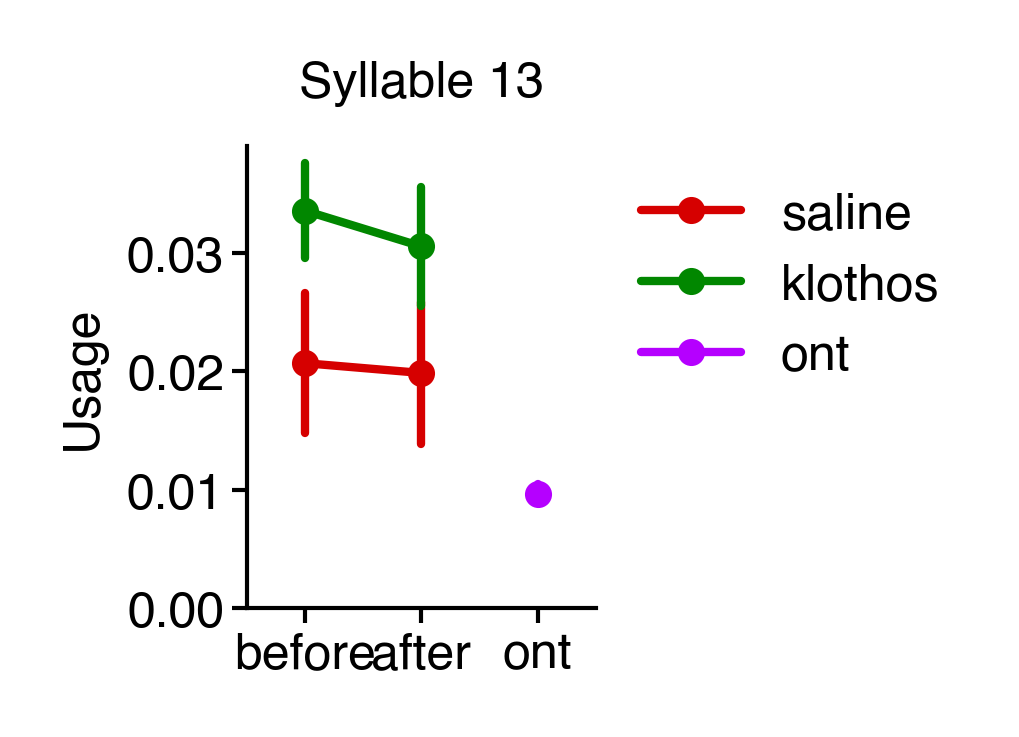

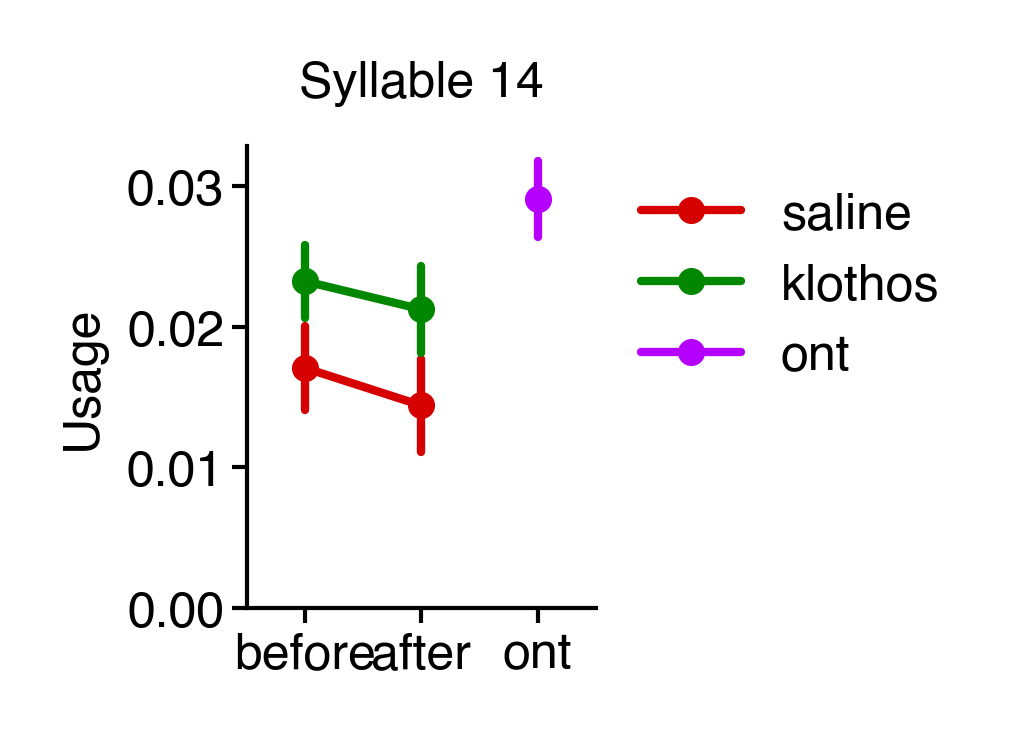

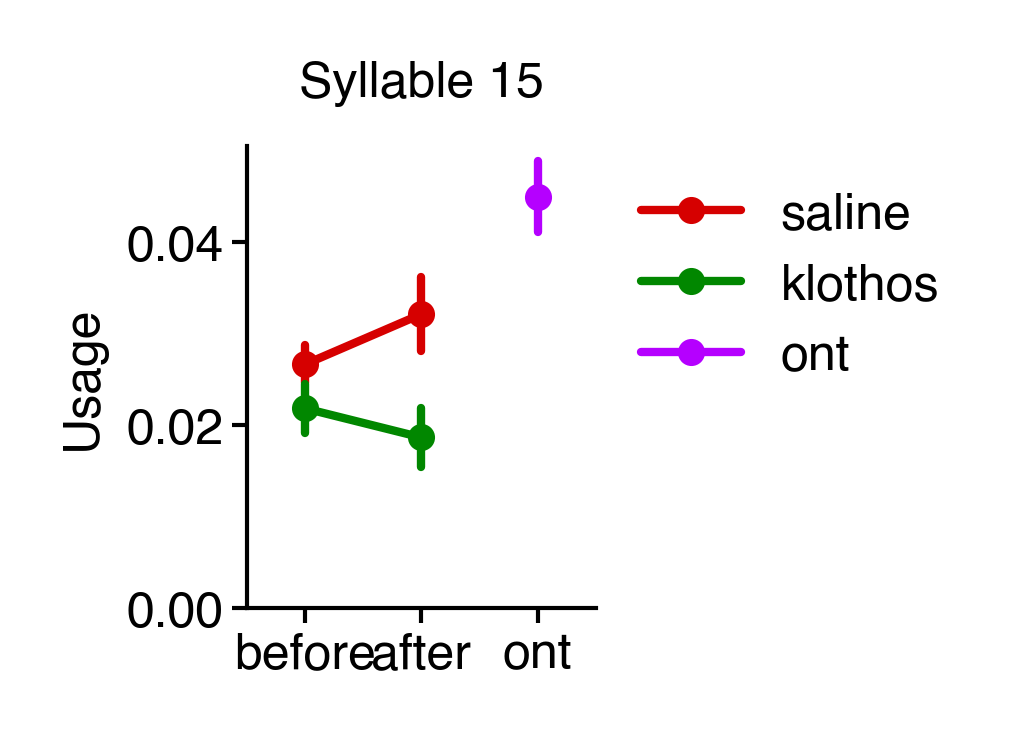

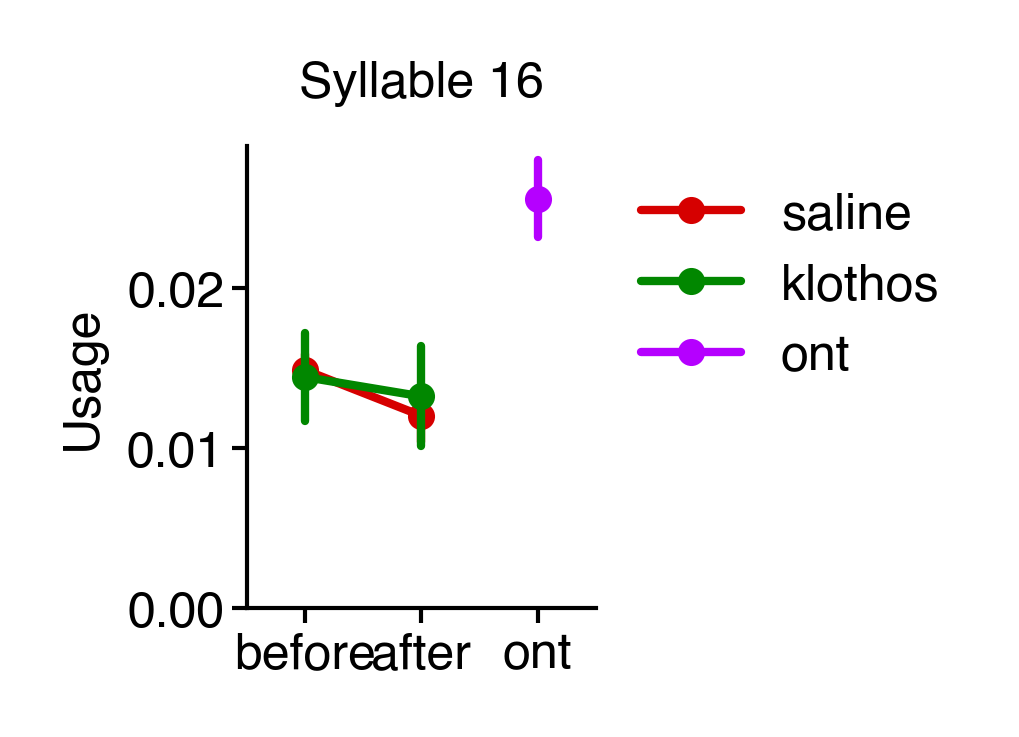

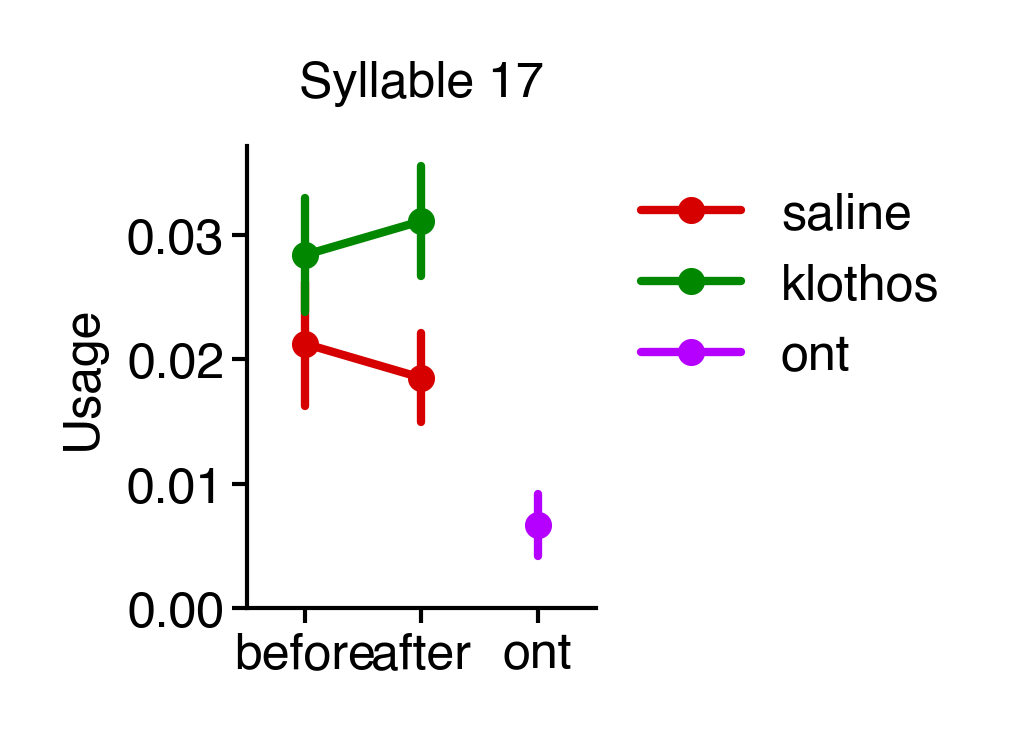

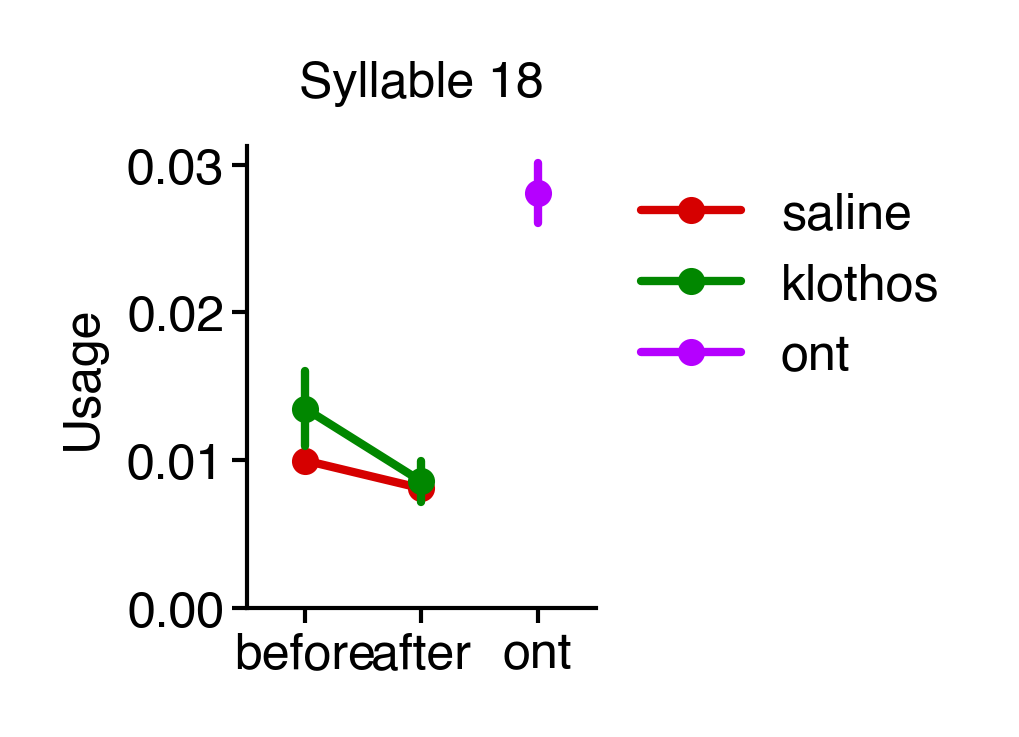

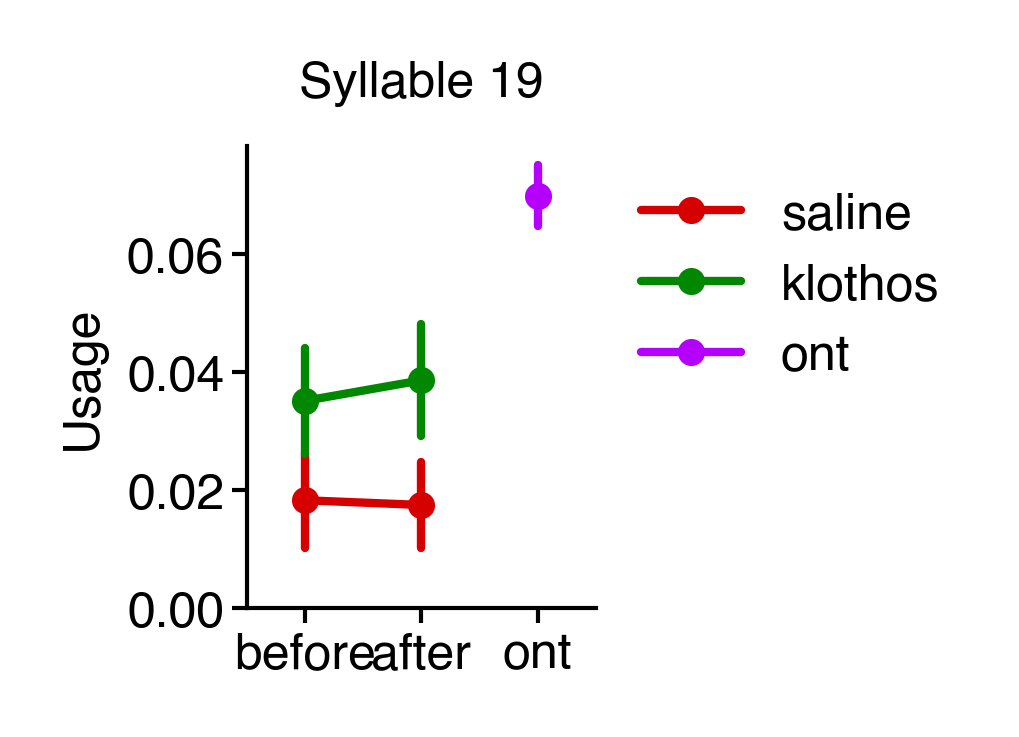

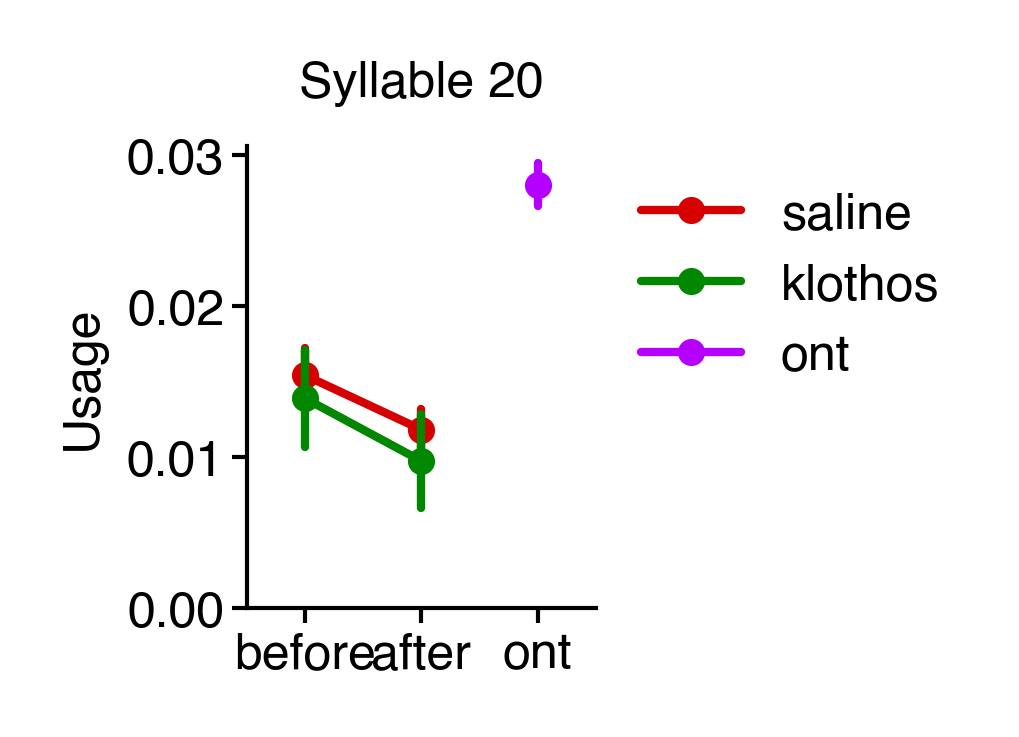

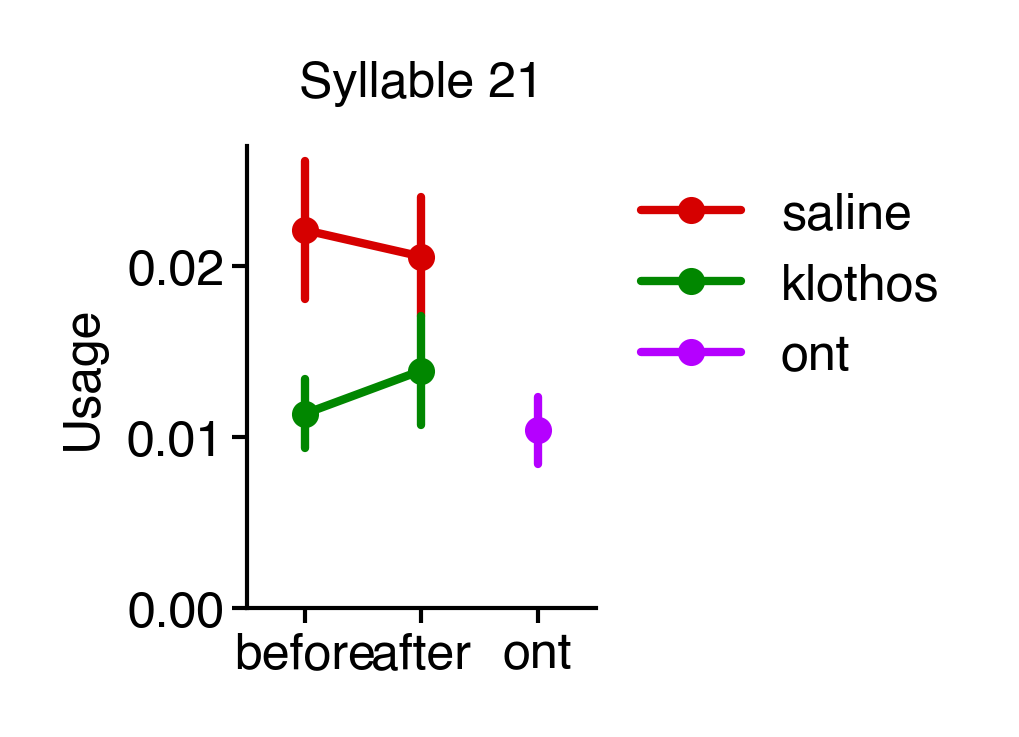

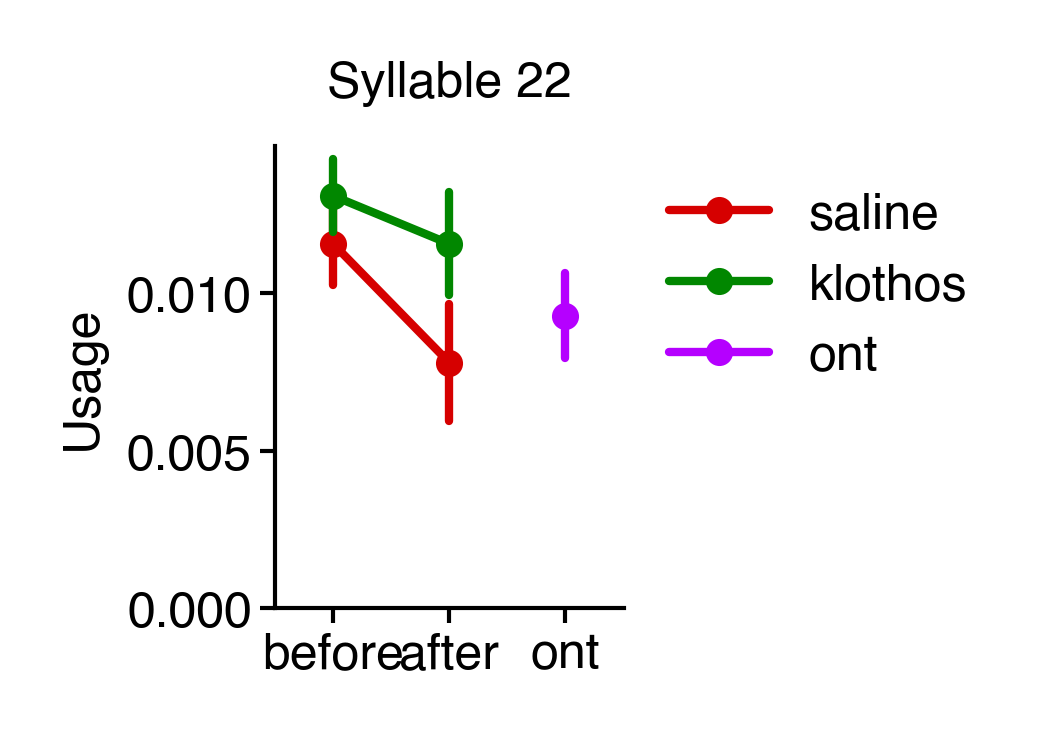

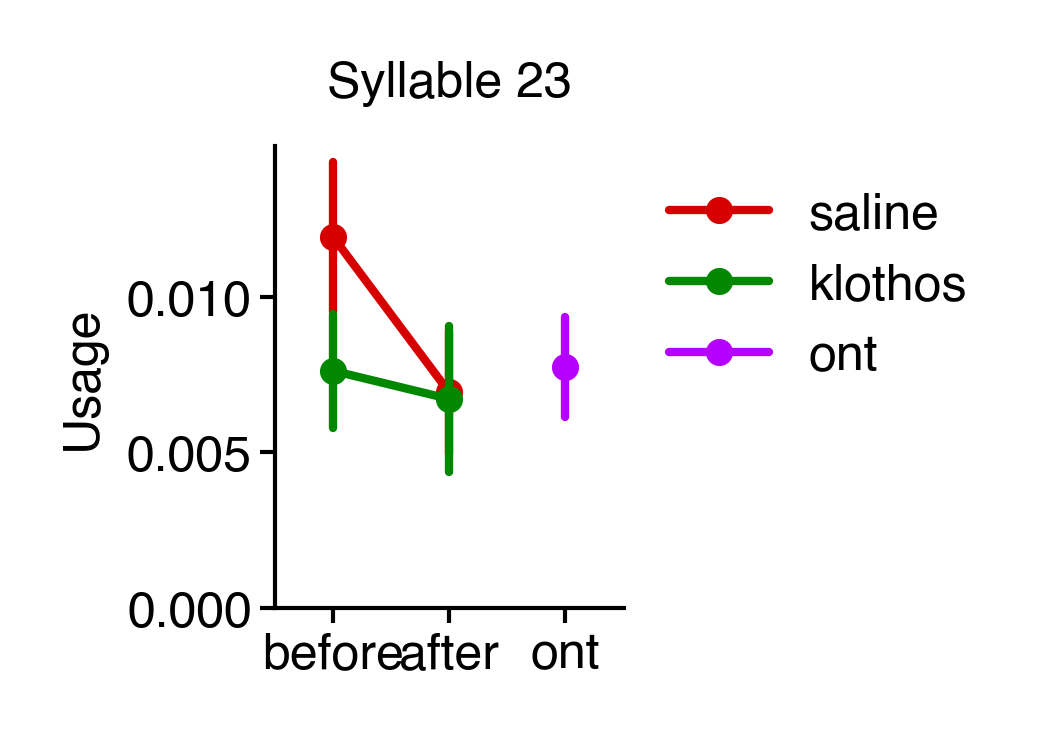

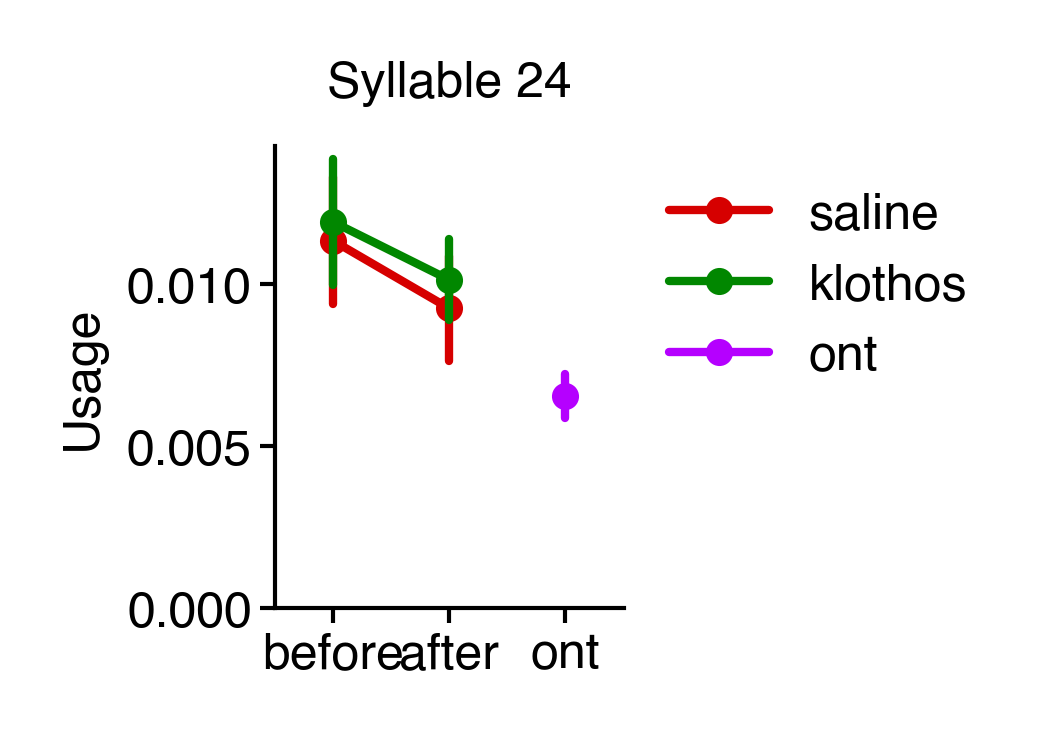

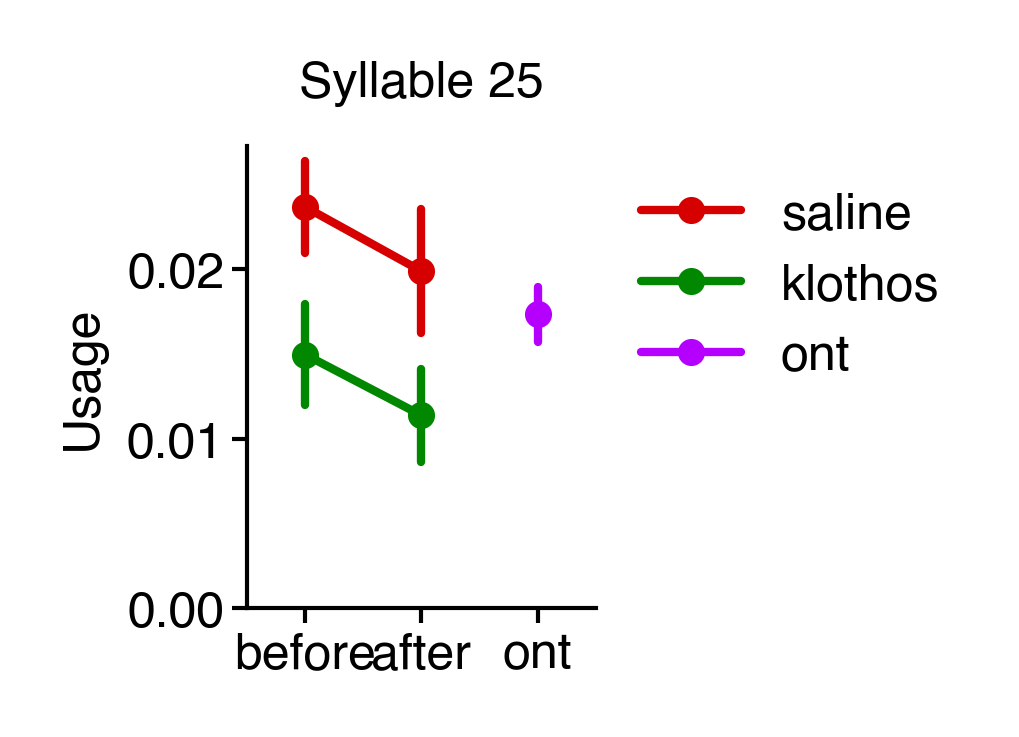

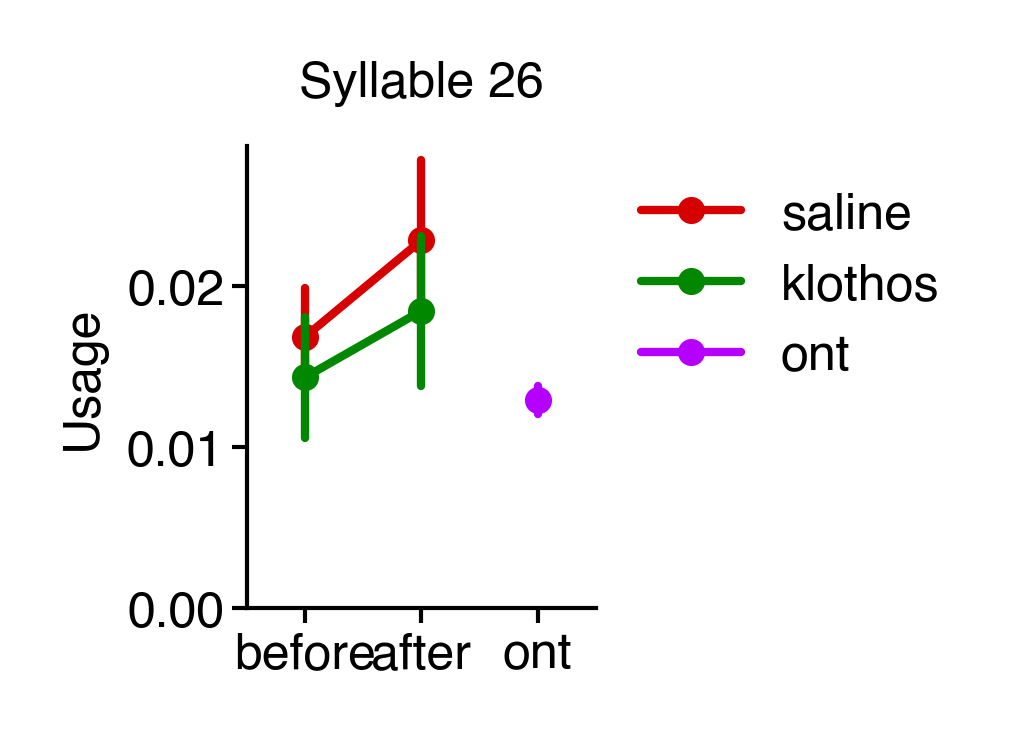

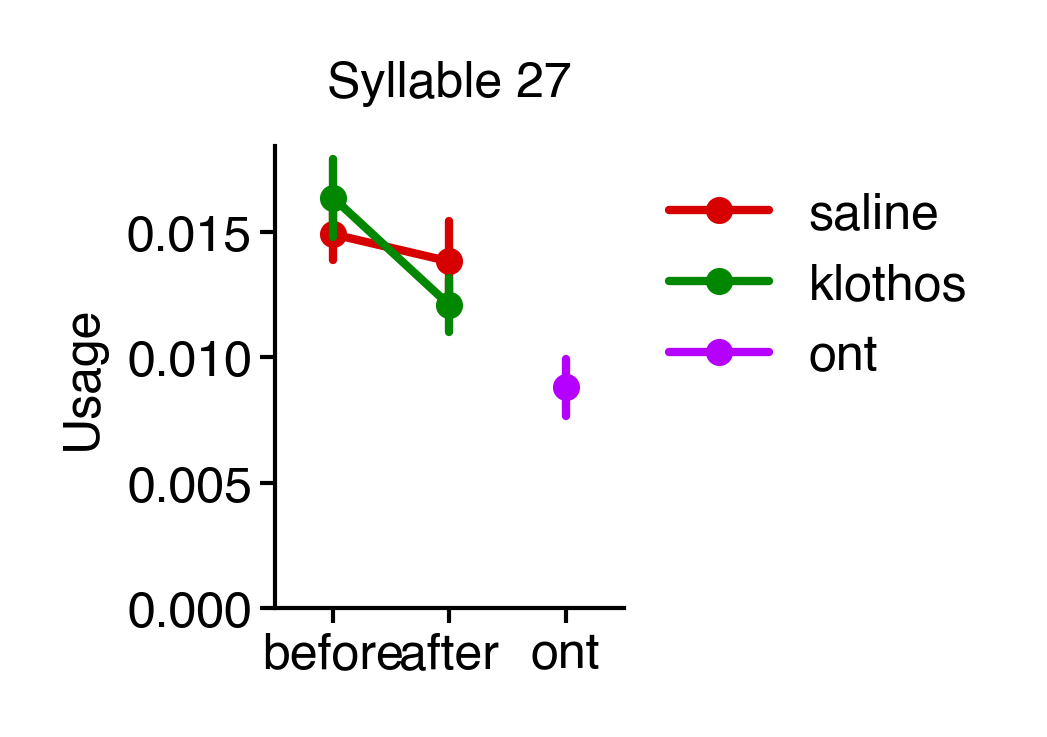

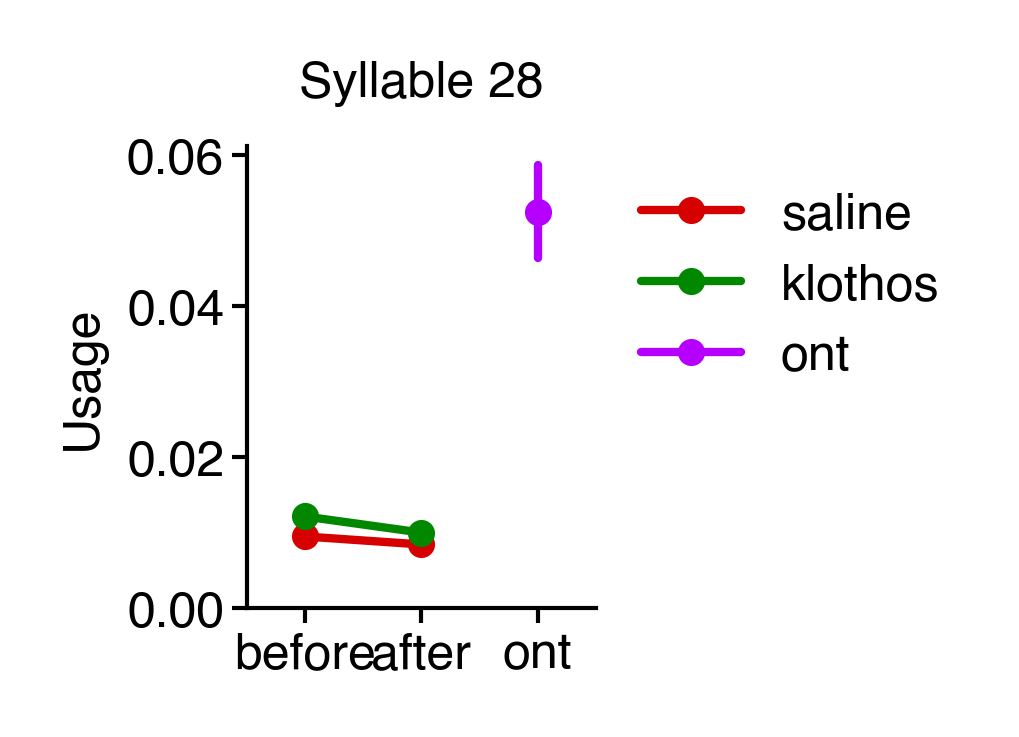

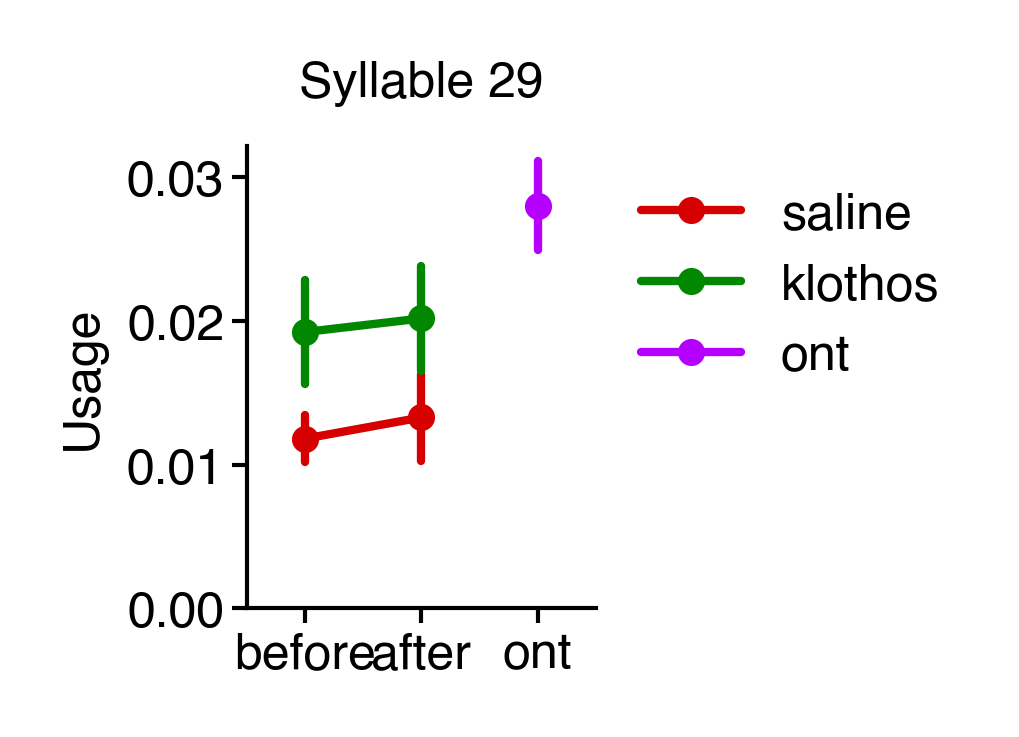

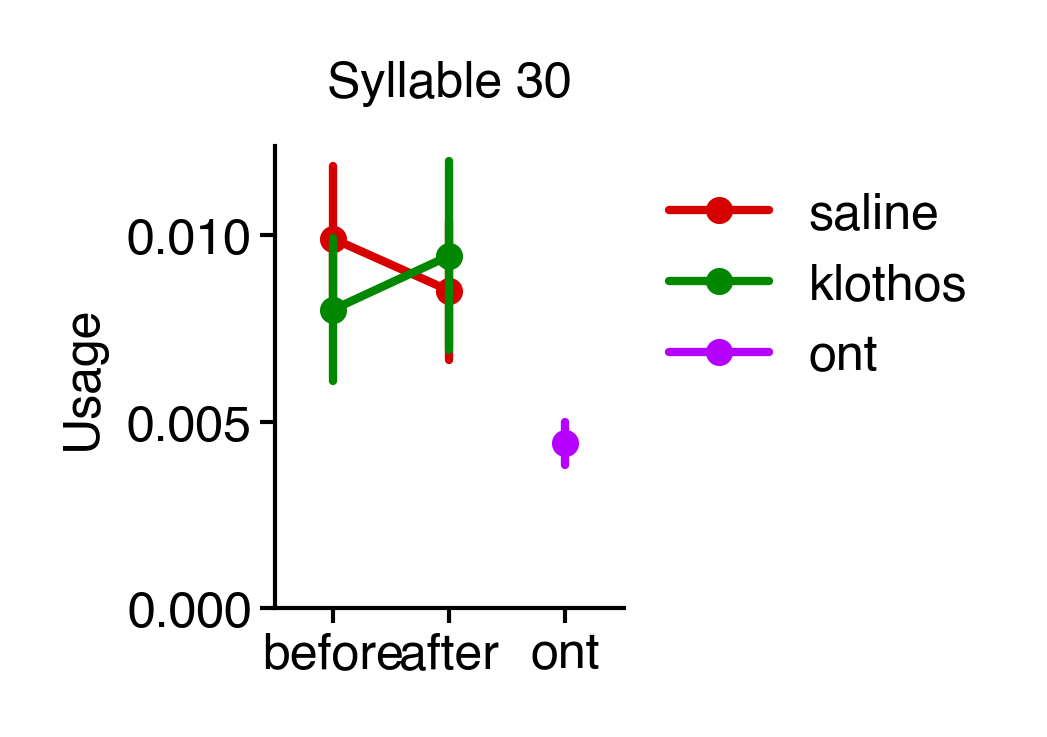

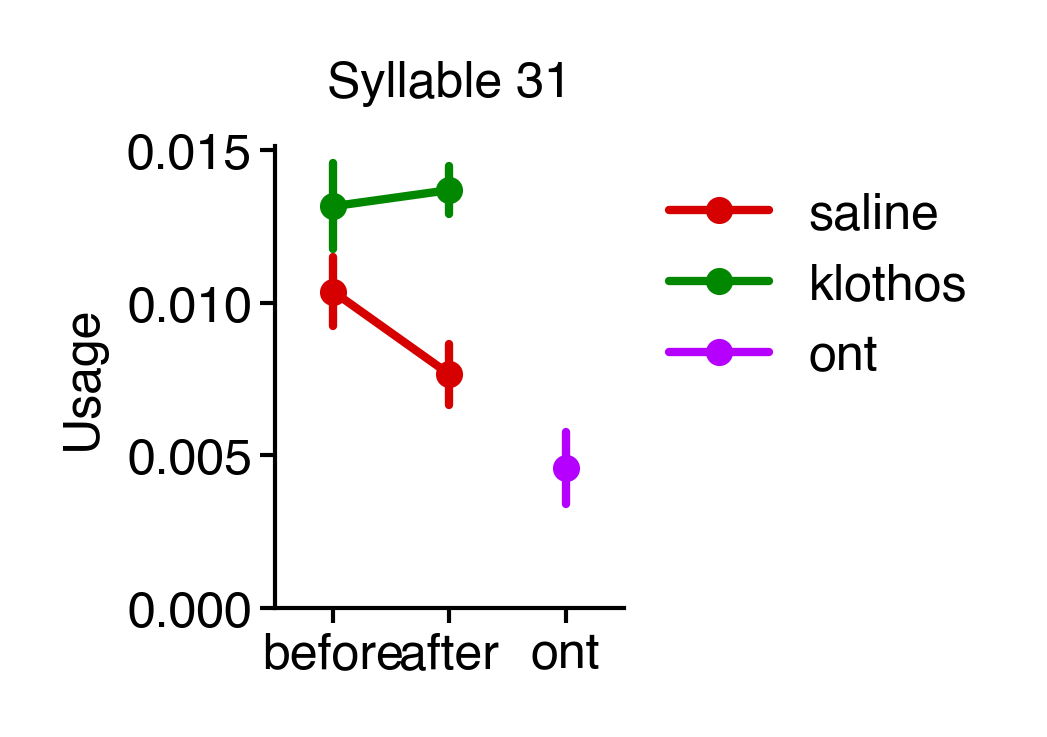

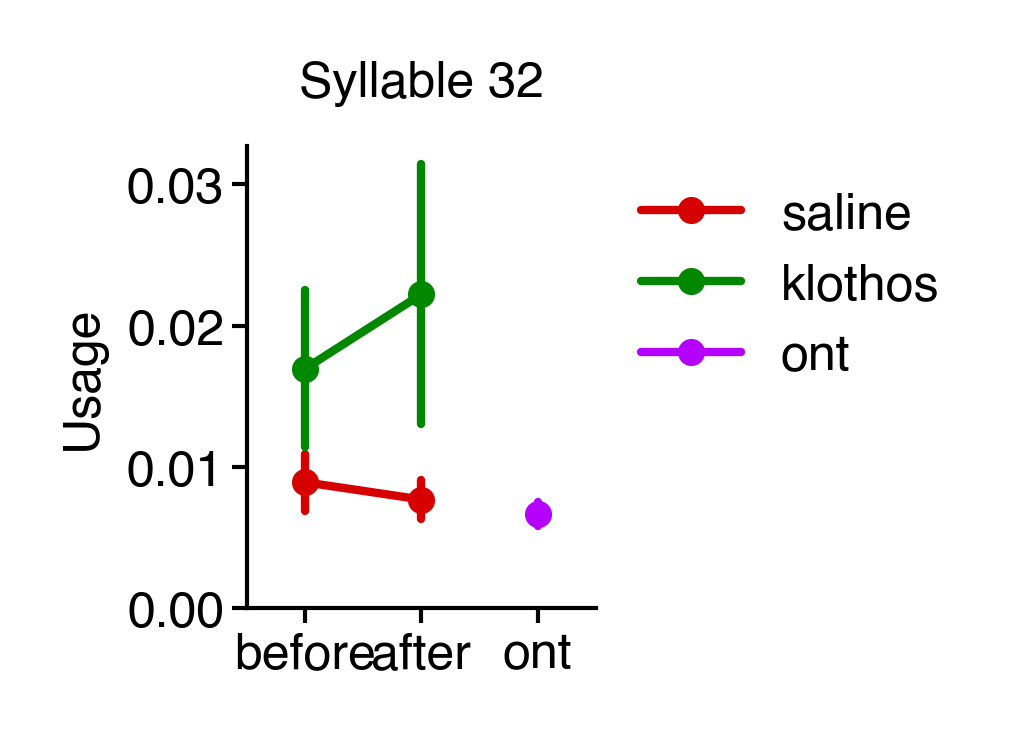

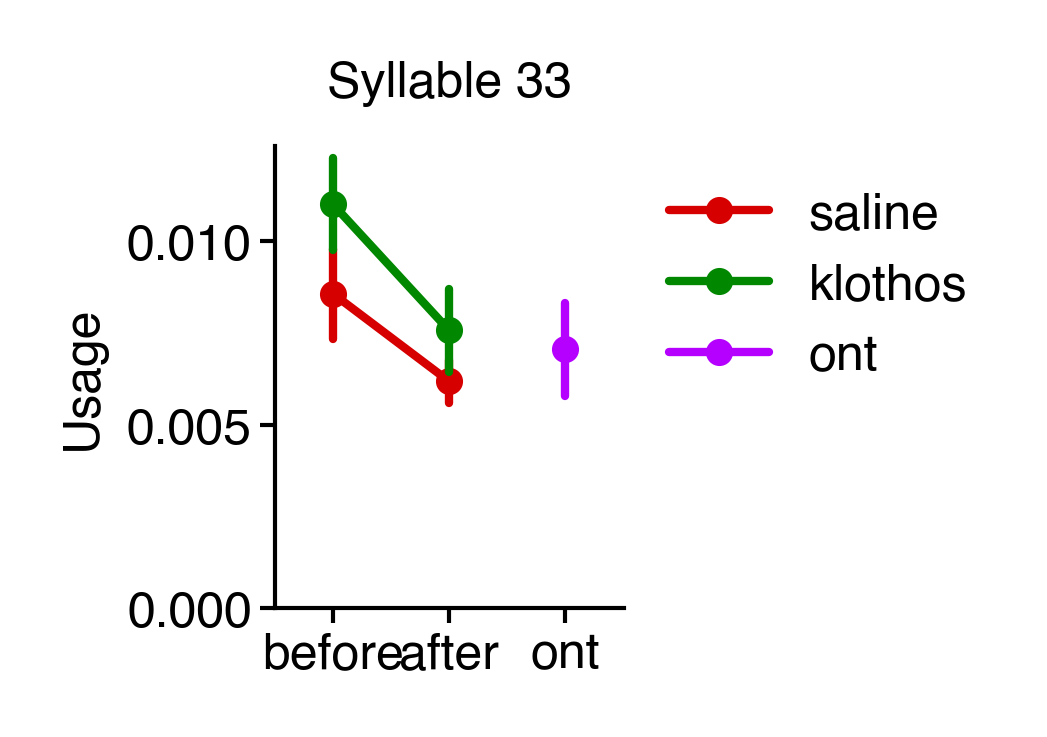

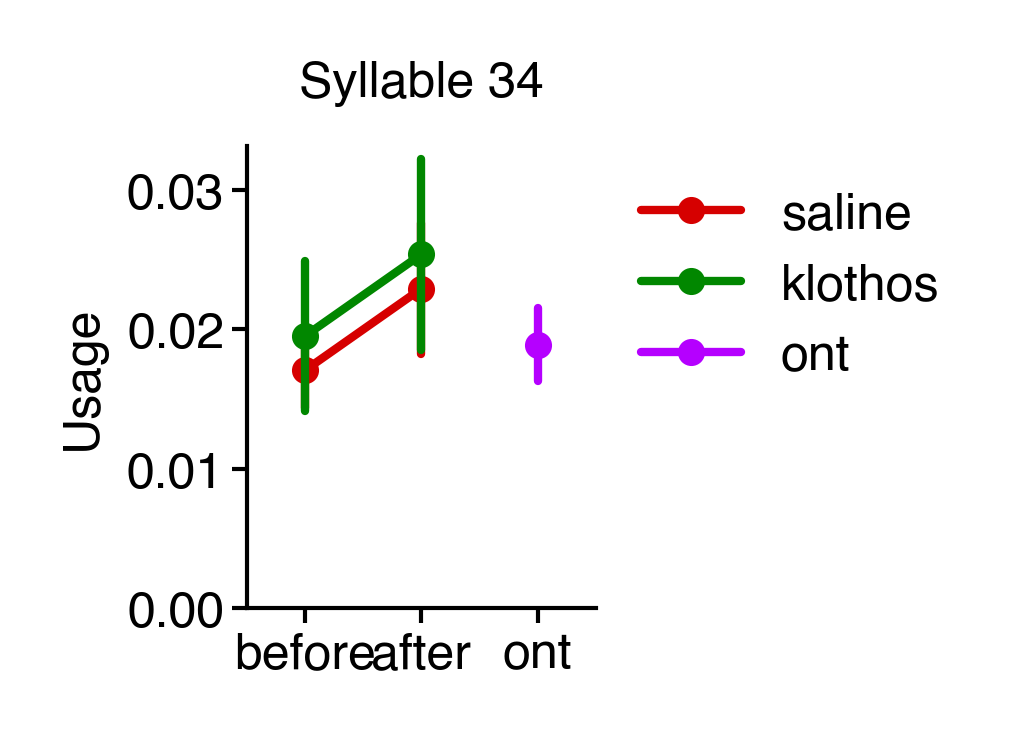

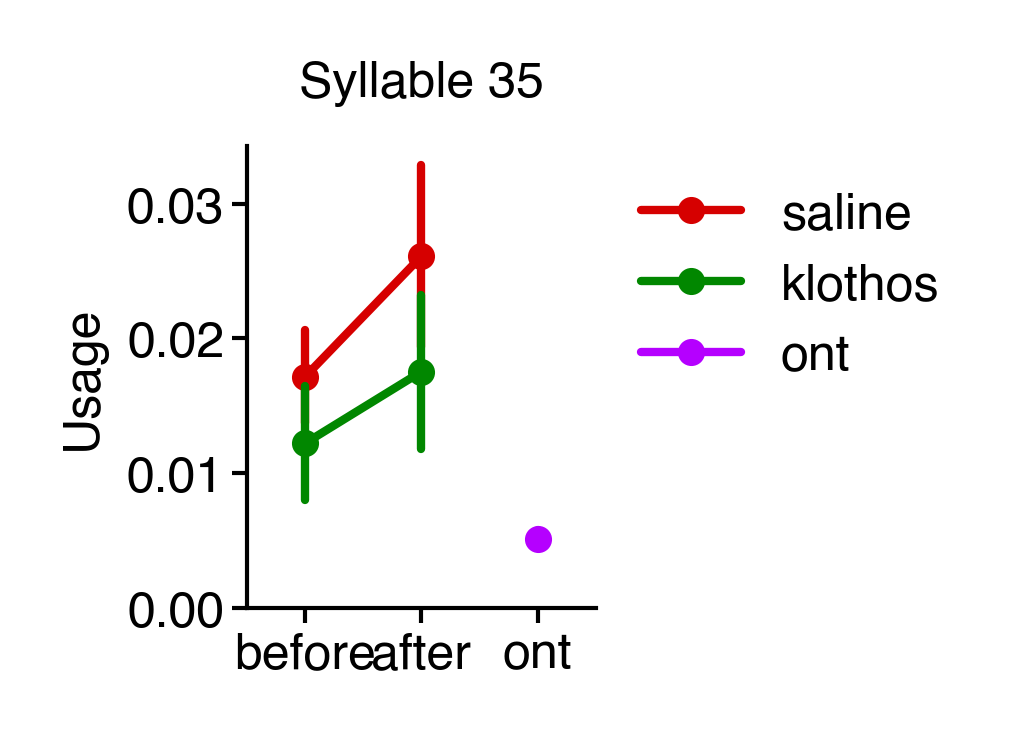

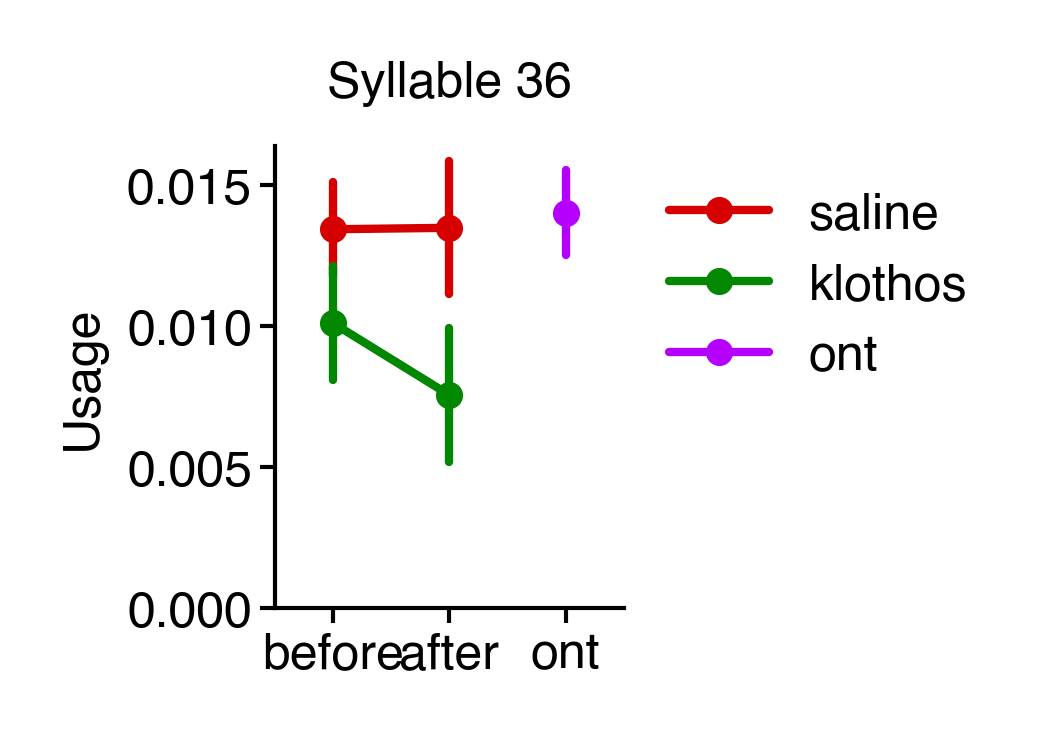

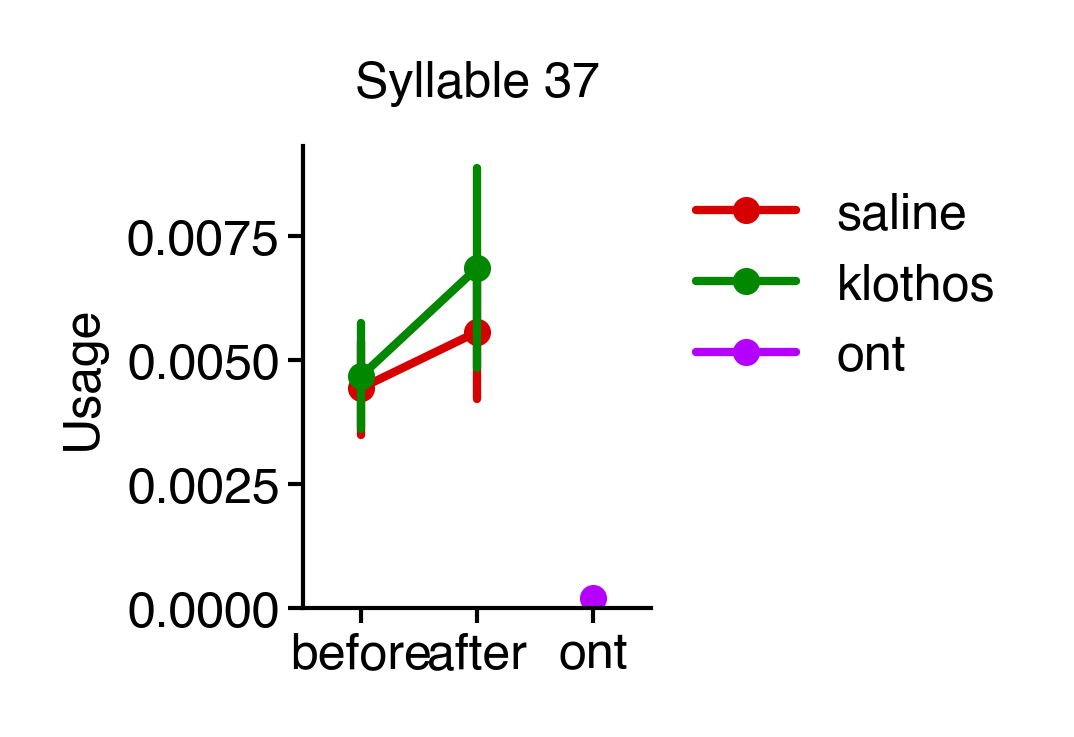

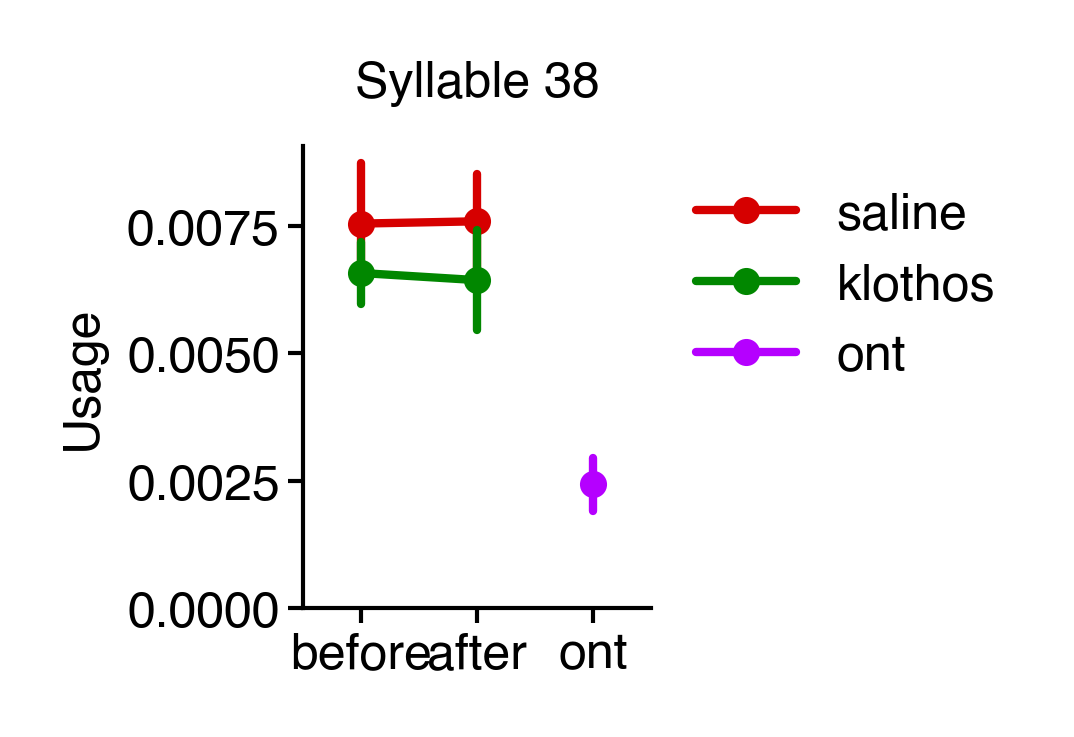

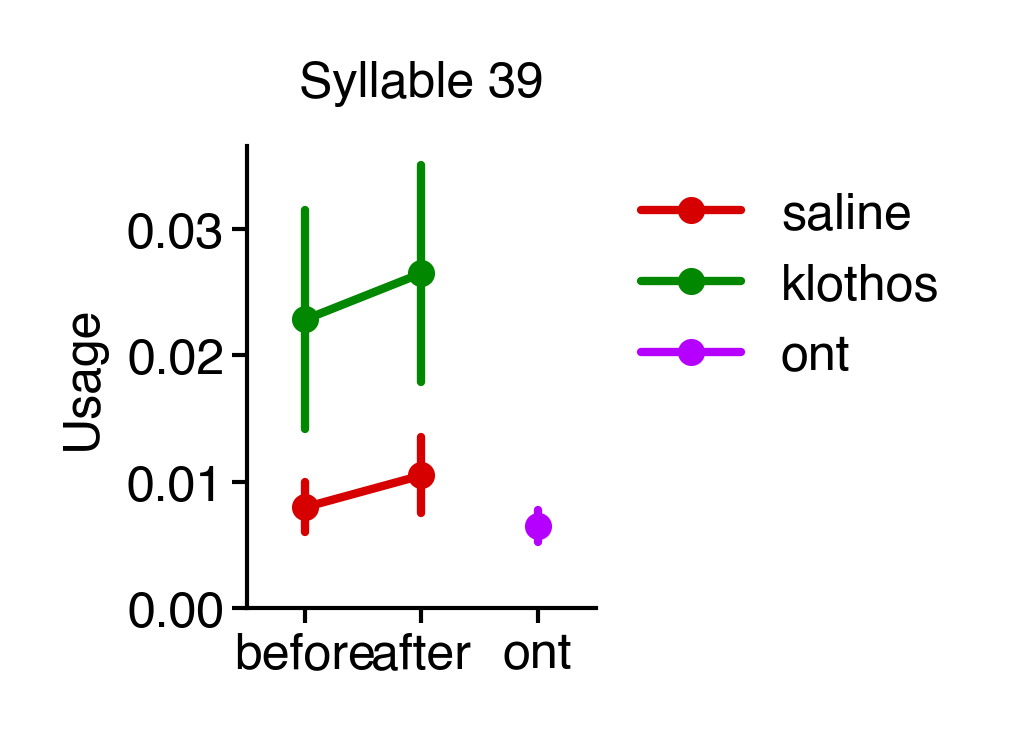

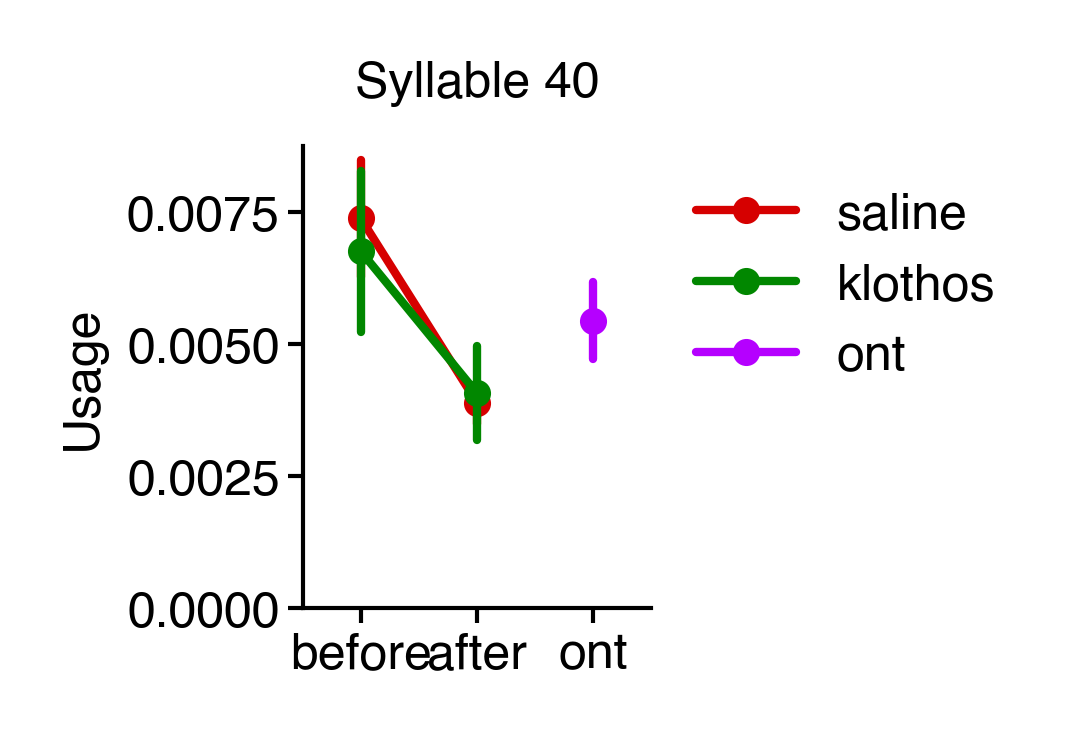

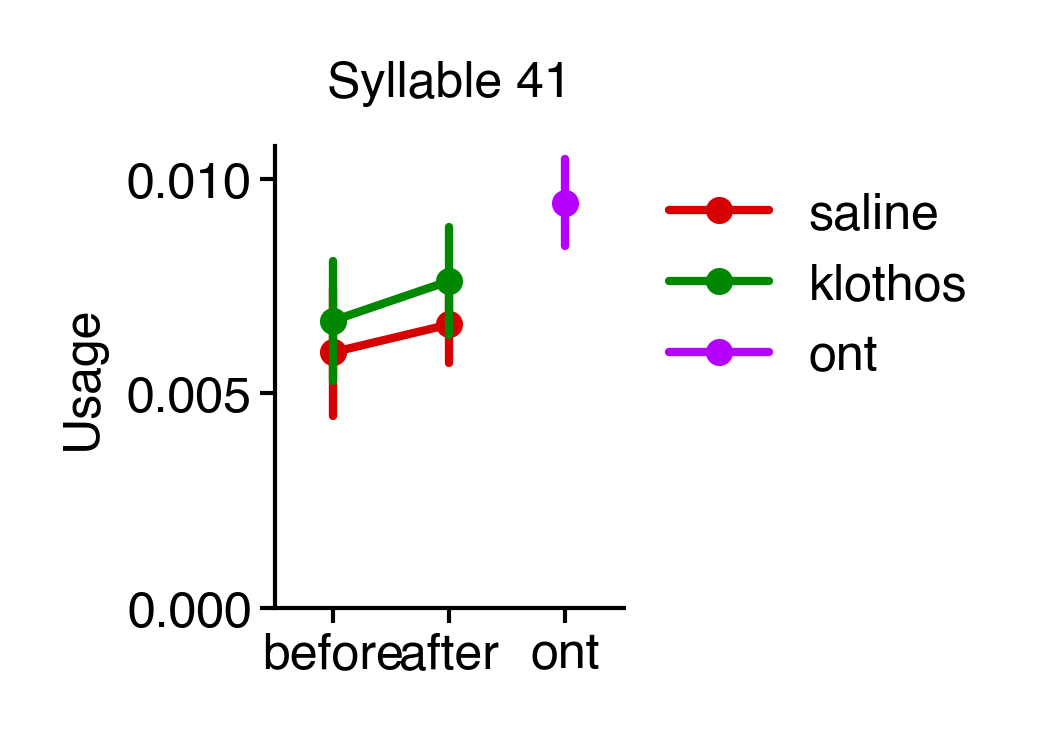

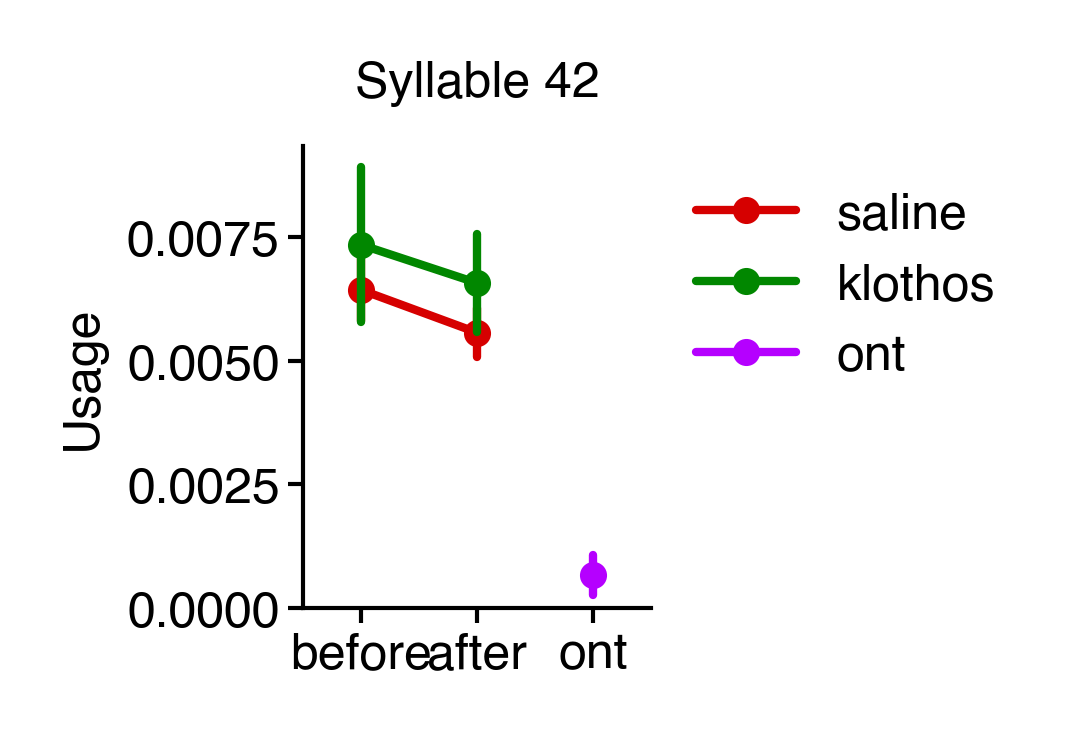

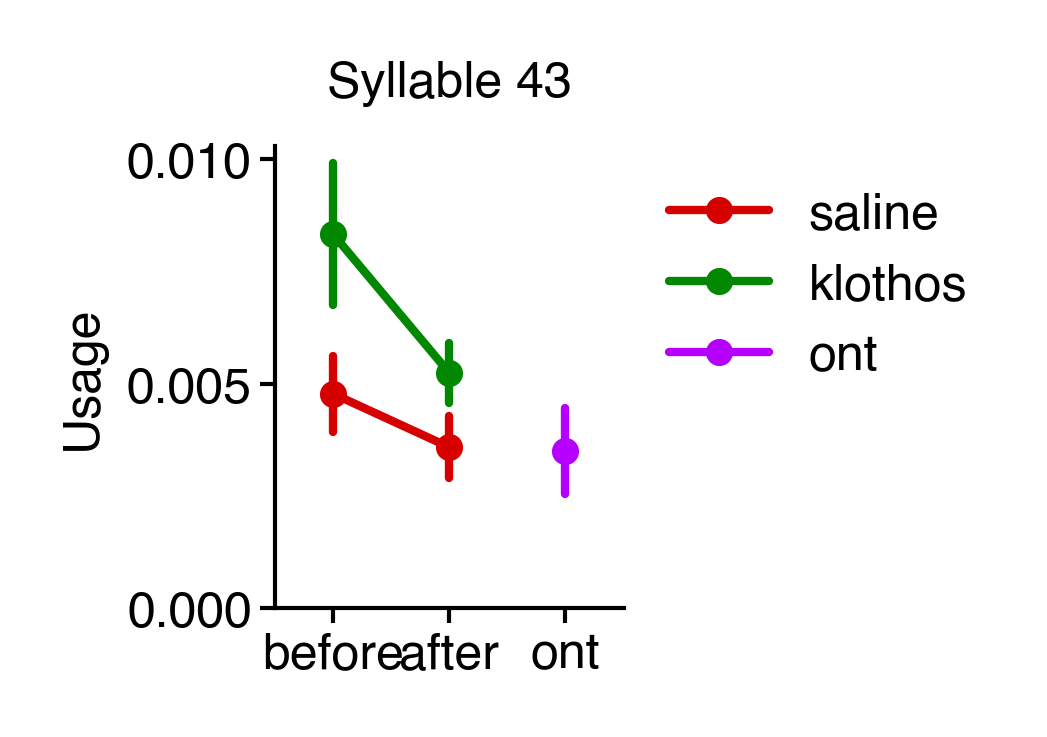

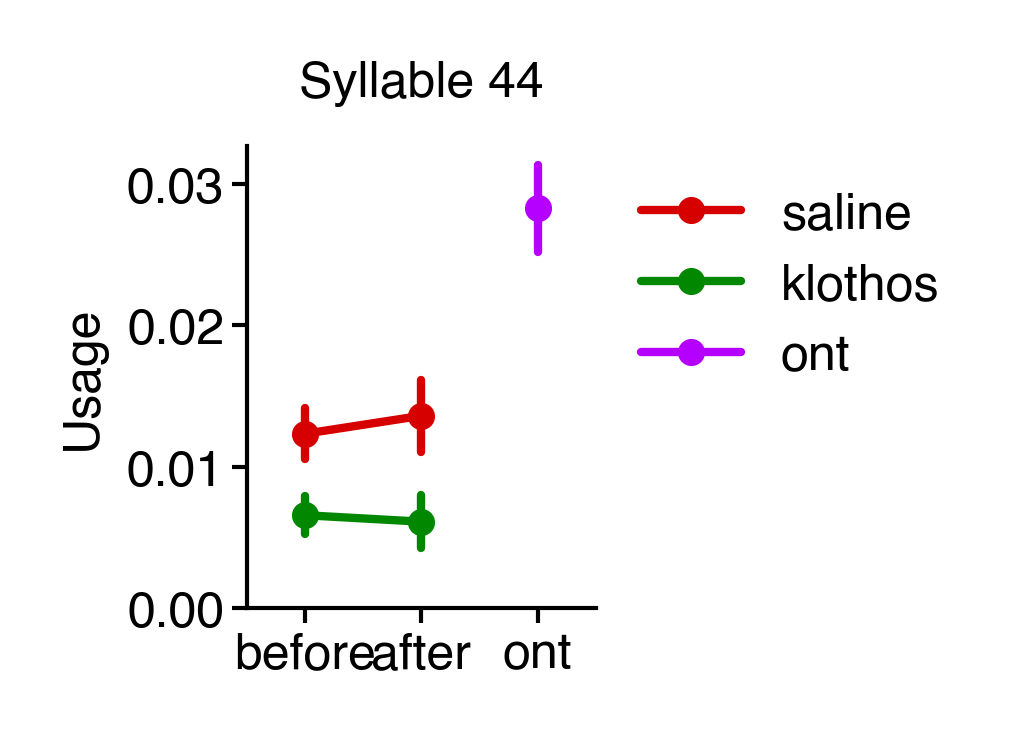

In [48]:
for syllable in range(45):
    fig = figure(0.75, 1)
    ax = sns.pointplot(
        data=combined.reset_index(),
        x="session_type",
        y=syllable,
        hue="exp_type",
        order=["before", "after", "ont"],
        palette=cc.glasbey_light[:3],
        lw=1,
        markersize=2.5, errorbar='se',
    )
    ax.set(xlabel="", ylabel="Usage", title=f"Syllable {syllable}", ylim=(0, None))
    legend()
    sns.despine()